In [ ]:
#!pip install yfinance

In [ ]:
import yfinance as yf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Parameters
trading_days = 252

# Constants
SAVE_FIGS = False # CHANGE TO SAVE FIGURES TO COMPUTER
RETURNS_TITLE = "Returns"
DAYS5_TITLE = "5-Day Moving Avg"
MONTHS1_TITLE = "1-Month Moving Avg"
MONTHS3_TITLE = "3-Month Moving Avg"
VOLUME_TITLE = "Trading Notional"
SP500_TITLE = "S&P 500 Comparison"

PRICE = "Price"
PCT_CHANGE = "% Change"

In [ ]:
tickers = [
    # Energy (black)
    'XOM', 'CVX', 'COP', 'SLB', 'EOG',
    # Industrials (red)
    'CAT', 'MMM', 'GE', 'DE', 'UNP',
    # Health Care (purple)
    'JNJ', 'PFE', 'MRK', 'ABT', 'BMY', 'AMGN',
    # Financials (orange/yellow)
    'JPM', 'GS', 'BAC', 'MS', 'STT',
    # Consumer Discretionary (green)
    'DIS', 'NKE', 'SBUX', 'LOW',
    # Technology (blue)
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META',
]

sector_colors = {
    'Technology': 'blue',
    'Consumer Discretionary': 'green',
    'Industrials': 'red',
    'Health Care': 'purple',
    'Financials': 'orange',
    'Energy': 'black'
}

ticker_sector = {
    'AAPL': 'Technology', 'MSFT': 'Technology', 'AMZN': 'Technology',
    'GOOGL': 'Technology', 'META': 'Technology', 'DIS': 'Consumer Discretionary',
    'CAT': 'Industrials', 'JNJ': 'Health Care', 'JPM': 'Financials',
    'XOM': 'Energy', 'CVX': 'Energy', 'COP': 'Energy', 'SLB': 'Energy', 'EOG': 'Energy',
    'GS': 'Financials', 'BAC': 'Financials', 'MS': 'Financials', 'STT': 'Financials',
    'MMM': 'Industrials', 'GE': 'Industrials', 'HON': 'Industrials',
    'DE': 'Industrials', 'UNP': 'Industrials',
    'NKE': 'Consumer Discretionary', 'SBUX': 'Consumer Discretionary',
    'GPS': 'Consumer Discretionary', 'LOW': 'Consumer Discretionary',
    'PFE': 'Health Care', 'MRK': 'Health Care', 'ABT': 'Health Care', 'BMY': 'Health Care', 'AMGN': 'Health Care'
}

len(tickers)

30

In [ ]:
data = yf.download(tickers, start='2021-01-01', end='2024-01-01')

# Adjusted Close prices
stock_df = adj_close = data['Adj Close'].fillna(method='ffill') # handle missing data by FORWARD-FILLING

# Daily returns
returns_df = stock_df.pct_change().dropna(how='all')
returns_df = returns_df[tickers]

# sanity check dataframe
print(returns_df.columns)

[*********************100%%**********************]  30 of 30 completed


Index(['XOM', 'CVX', 'COP', 'SLB', 'EOG', 'CAT', 'MMM', 'GE', 'DE', 'UNP',
       'JNJ', 'PFE', 'MRK', 'ABT', 'BMY', 'AMGN', 'JPM', 'GS', 'BAC', 'MS',
       'STT', 'DIS', 'NKE', 'SBUX', 'LOW', 'AAPL', 'MSFT', 'AMZN', 'GOOGL',
       'META'],
      dtype='object', name='Ticker')


In [ ]:
# 5-day moving average of returns
moving_average_5d_df = returns_df.rolling(window=5).mean().dropna()

#sanity check
moving_average_5d_df.head()
moving_average_5d_df.tail()

Ticker,XOM,CVX,COP,SLB,EOG,CAT,MMM,GE,DE,UNP,...,STT,DIS,NKE,SBUX,LOW,AAPL,MSFT,AMZN,GOOGL,META
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,0.002045,0.002291,0.005400,0.003416,0.003605,0.003284,-0.001109,0.005700,0.005645,0.001399,...,-0.001069,-0.005173,-0.022011,-0.002946,-0.002273,-0.004035,0.002081,0.004648,0.013083,0.010866
2023-12-26,0.001010,0.003650,0.007084,0.005331,0.004411,0.006935,0.004315,0.006266,0.009603,0.003530,...,0.001438,-0.004043,-0.021373,-0.001735,-0.001078,-0.002902,0.001088,-0.000833,0.008299,0.005889
2023-12-27,-0.002566,0.000375,0.003425,0.000232,0.002866,0.003544,0.004762,0.003849,0.003945,0.002668,...,0.000812,-0.007601,-0.025498,-0.004932,-0.002229,-0.003871,0.000446,-0.000561,0.005422,0.004248
2023-12-28,-0.002118,-0.000609,-0.000277,-0.001124,-0.000070,0.004931,0.011366,0.008117,0.006882,0.006804,...,0.006163,-0.001893,-0.020369,0.002572,0.000806,-0.001283,0.002507,0.001663,0.002749,0.005139
2023-12-29,-0.003446,-0.002036,-0.001255,-0.002004,-0.000120,0.003867,0.007045,0.001206,0.004047,0.002888,...,0.002944,-0.003780,-0.022641,0.001429,-0.000896,-0.002214,0.001337,-0.002476,-0.001028,-0.000049


In [ ]:
# 21-day moving average of returns
moving_average_21d_df = returns_df.rolling(window=21).mean().dropna()

#sanity check
moving_average_21d_df.head()
moving_average_21d_df.tail()

Ticker,XOM,CVX,COP,SLB,EOG,CAT,MMM,GE,DE,UNP,...,STT,DIS,NKE,SBUX,LOW,AAPL,MSFT,AMZN,GOOGL,META
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,-0.000907,0.002230,0.001208,0.000886,0.000311,0.008041,0.005283,0.002820,0.003388,0.004450,...,0.004846,-0.001839,0.000645,-0.003843,0.005665,0.000605,-0.000370,0.002196,0.001156,0.001752
2023-12-26,-0.001056,0.002471,0.001493,0.001352,0.000974,0.008644,0.005790,0.002966,0.003995,0.004616,...,0.004832,-0.002371,0.000759,-0.003345,0.005485,0.000804,-0.000307,0.002183,0.001785,0.002401
2023-12-27,-0.001002,0.002492,0.001565,0.000821,0.001155,0.009039,0.005512,0.003276,0.005065,0.005658,...,0.005418,-0.002228,0.000226,-0.003339,0.005321,0.000873,-0.000531,0.001840,0.001495,0.003300
2023-12-28,-0.001663,0.001442,0.000691,0.000329,-0.000219,0.008820,0.005221,0.003765,0.005245,0.005400,...,0.005441,-0.000882,0.000628,-0.002470,0.005268,0.000826,-0.000891,0.002078,0.001172,0.002755
2023-12-29,-0.001048,0.001772,0.000933,0.000547,-0.000214,0.008251,0.005080,0.003505,0.004799,0.005270,...,0.004168,-0.000940,-0.000191,-0.001805,0.005224,0.000826,-0.000316,0.001861,0.001756,0.003130


In [ ]:
# 63-day moving average of returns
moving_average_63d_df = returns_df.rolling(window=63).mean().dropna()

#sanity check
moving_average_63d_df.head()
#moving_average_63d_df.tail()

Ticker,XOM,CVX,COP,SLB,EOG,CAT,MMM,GE,DE,UNP,...,STT,DIS,NKE,SBUX,LOW,AAPL,MSFT,AMZN,GOOGL,META
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-06,0.005391,0.003585,0.005033,0.004023,0.006705,0.004016,0.002256,0.004280,0.005700,0.001572,...,0.002909,0.001235,-0.000158,0.001685,0.003238,-0.000165,0.002226,0.000320,0.004134,0.002286
2021-04-07,0.004696,0.003250,0.004062,0.003117,0.005632,0.003870,0.002292,0.003813,0.005272,0.001395,...,0.002770,0.000986,-0.000358,0.001638,0.003141,-0.000149,0.002341,0.000435,0.004220,0.002520
2021-04-08,0.004126,0.002561,0.003083,0.002071,0.005057,0.002991,0.002113,0.003015,0.004311,0.000979,...,0.001627,0.000905,-0.000816,0.001502,0.002973,0.000690,0.002966,0.000927,0.004457,0.002965
2021-04-09,0.003965,0.002471,0.002646,0.001589,0.003938,0.002980,0.002705,0.003318,0.003923,0.000979,...,0.001994,0.001001,-0.000896,0.001649,0.003262,0.000470,0.002677,0.001157,0.004126,0.002609
2021-04-12,0.003683,0.002144,0.002531,0.001484,0.003501,0.002990,0.002981,0.003207,0.004284,0.000546,...,0.002201,0.000873,-0.000910,0.001381,0.003303,0.000123,0.002584,0.001088,0.003734,0.002632


In [ ]:
# Percent change in trading notional, as Zijian suggested
volume_df = (data['Volume'].dropna(how='all') * data['Adj Close'].dropna(how='all')).pct_change()
volume_df = volume_df.dropna(how='all')
volume_df = volume_df[tickers]

volume_df.head()

Ticker,XOM,CVX,COP,SLB,EOG,CAT,MMM,GE,DE,UNP,...,STT,DIS,NKE,SBUX,LOW,AAPL,MSFT,AMZN,GOOGL,META
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.662444,0.491889,0.524214,0.959252,0.380247,-0.274772,-0.235222,0.076912,-0.330507,-0.185062,...,0.208049,-0.418688,-0.320761,-0.286107,-0.458117,-0.310041,-0.357772,-0.392015,-0.450107,-0.341583
2021-01-06,-0.150319,0.070810,-0.074058,0.263056,0.153086,1.891179,0.480113,0.658214,0.607906,0.205740,...,1.268053,-0.028996,0.470313,-0.116801,0.278908,0.534507,0.469128,0.613777,1.265633,1.397346
2021-01-07,-0.184324,-0.329585,-0.101784,-0.240265,-0.041879,-0.339414,0.707189,-0.432355,-0.172452,-0.183587,...,-0.506686,-0.031793,-0.118557,-0.000193,-0.157309,-0.269335,-0.207291,-0.194246,-0.072968,-0.338287
2021-01-08,-0.019694,0.212328,-0.020677,-0.177192,0.019868,-0.398378,-0.194959,-0.028137,-0.215904,0.994757,...,-0.027889,0.081986,-0.241253,0.186763,0.209404,-0.032053,-0.166041,0.013140,-0.142652,0.168326
2021-01-11,0.376517,-0.040923,0.164144,0.420604,-0.011592,-0.204303,-0.435686,-0.066196,-0.265480,-0.248120,...,0.142359,-0.179712,0.081468,-0.282026,-0.390826,-0.067589,-0.006459,0.018779,-0.042047,0.575574


In [ ]:
# Stock returns compared to S&P500 returns

# S&P 500 returns
sp500_df = yf.download('^GSPC', start='2021-01-01', end='2024-01-01')['Adj Close'].fillna(method='ffill')
sp500_returns_df = sp500_df.pct_change().dropna(how='all')

# Calculate relative performance
relative_returns_df = returns_df.sub(sp500_returns_df, axis=0)

relative_returns_df.head()

[*********************100%%**********************]  1 of 1 completed


Ticker,XOM,CVX,COP,SLB,EOG,CAT,MMM,GE,DE,UNP,...,STT,DIS,NKE,SBUX,LOW,AAPL,MSFT,AMZN,GOOGL,META
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.041110,0.019951,0.050284,0.046676,0.074345,0.001097,-0.008770,0.021571,0.017727,0.005183,...,-0.001131,-0.002805,0.000983,-0.003785,-0.003715,0.005281,-0.006118,0.002922,0.000982,0.000465
2021-01-06,0.019807,0.026474,0.034204,0.049630,0.015433,0.049943,0.009502,0.049072,0.052916,0.015215,...,0.062397,-0.001899,0.002221,0.001541,0.007651,-0.039371,-0.031639,-0.030606,-0.015577,-0.033979
2021-01-07,-0.007002,-0.010170,0.012503,0.004407,0.049809,-0.012939,-0.040509,-0.022770,0.017423,-0.000929,...,-0.013559,-0.017862,0.003417,-0.022910,-0.010923,0.019276,0.013610,-0.007270,0.015021,0.005775
2021-01-08,0.005629,0.004040,-0.005492,-0.007100,-0.001227,-0.005337,-0.023757,0.000719,-0.024909,0.023184,...,-0.013211,-0.004876,0.004167,0.016956,0.002693,0.003139,0.000601,0.001004,0.007747,-0.009846
2021-01-11,0.036911,0.012264,0.021320,0.012593,0.019125,0.004496,-0.001967,0.016255,0.009991,-0.000163,...,0.019650,0.008793,0.011338,-0.003571,0.014249,-0.016694,-0.003144,-0.014965,-0.016551,-0.033547


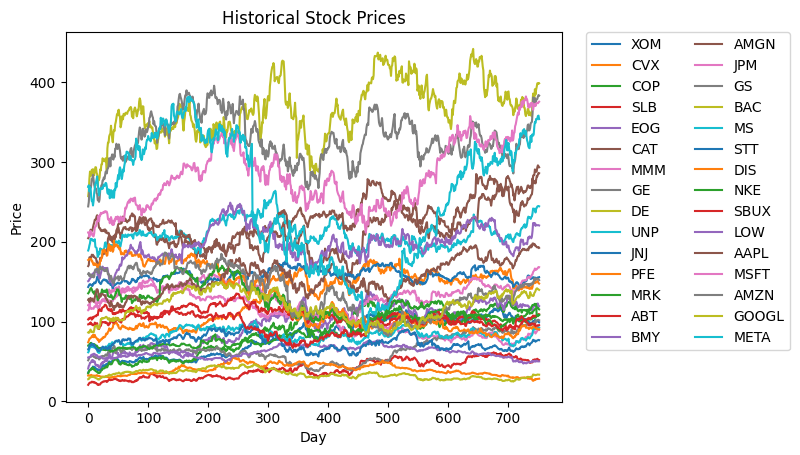

In [ ]:
def plot_stock_prices(df, ylab):
  for ticker in tickers:
      plt.plot(range(len(df[ticker])), df[ticker], label=ticker)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=2)
  plt.title(f"Historical Stock Prices")
  plt.xlabel("Day")
  plt.ylabel(ylab)
  #plt.tight_layout()
  plt.show()

# plots for different types of inputs
plot_stock_prices(stock_df, PRICE)

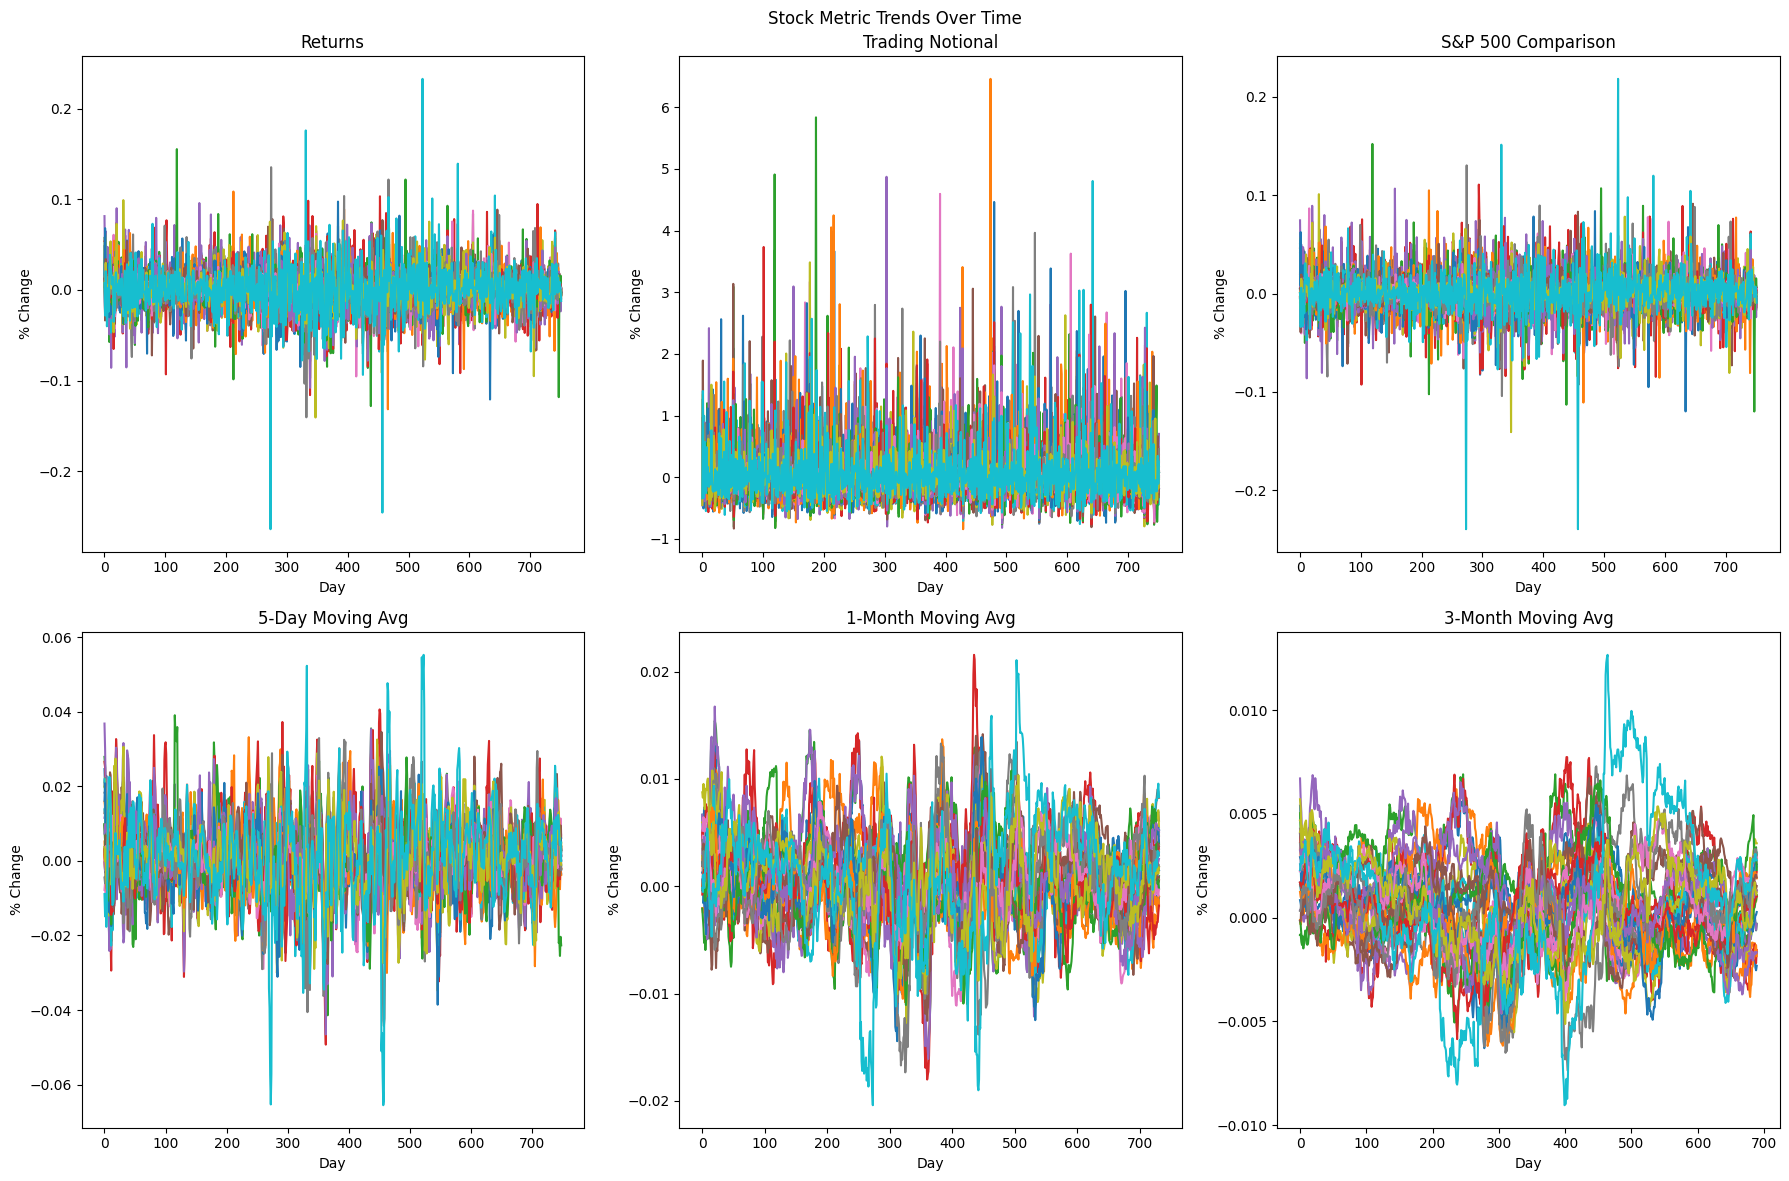

In [ ]:
def plot_stock_prices(df, title, ylab, ax):
    for ticker in tickers:
        ax.plot(range(len(df[ticker])), df[ticker], label=ticker)
    ax.set_title(title)
    ax.set_xlabel("Day")
    ax.set_ylabel(ylab)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_stock_prices(returns_df, RETURNS_TITLE, PCT_CHANGE, axs[0, 0])
plot_stock_prices(volume_df, VOLUME_TITLE, PCT_CHANGE, axs[0, 1])
plot_stock_prices(relative_returns_df, SP500_TITLE, PCT_CHANGE, axs[0, 2])
plot_stock_prices(moving_average_5d_df, DAYS5_TITLE, PCT_CHANGE, axs[1, 0])
plot_stock_prices(moving_average_21d_df, MONTHS1_TITLE, PCT_CHANGE, axs[1, 1])
plot_stock_prices(moving_average_63d_df, MONTHS3_TITLE, PCT_CHANGE, axs[1, 2])

plt.suptitle("Stock Metric Trends Over Time")
plt.tight_layout()
plt.show()

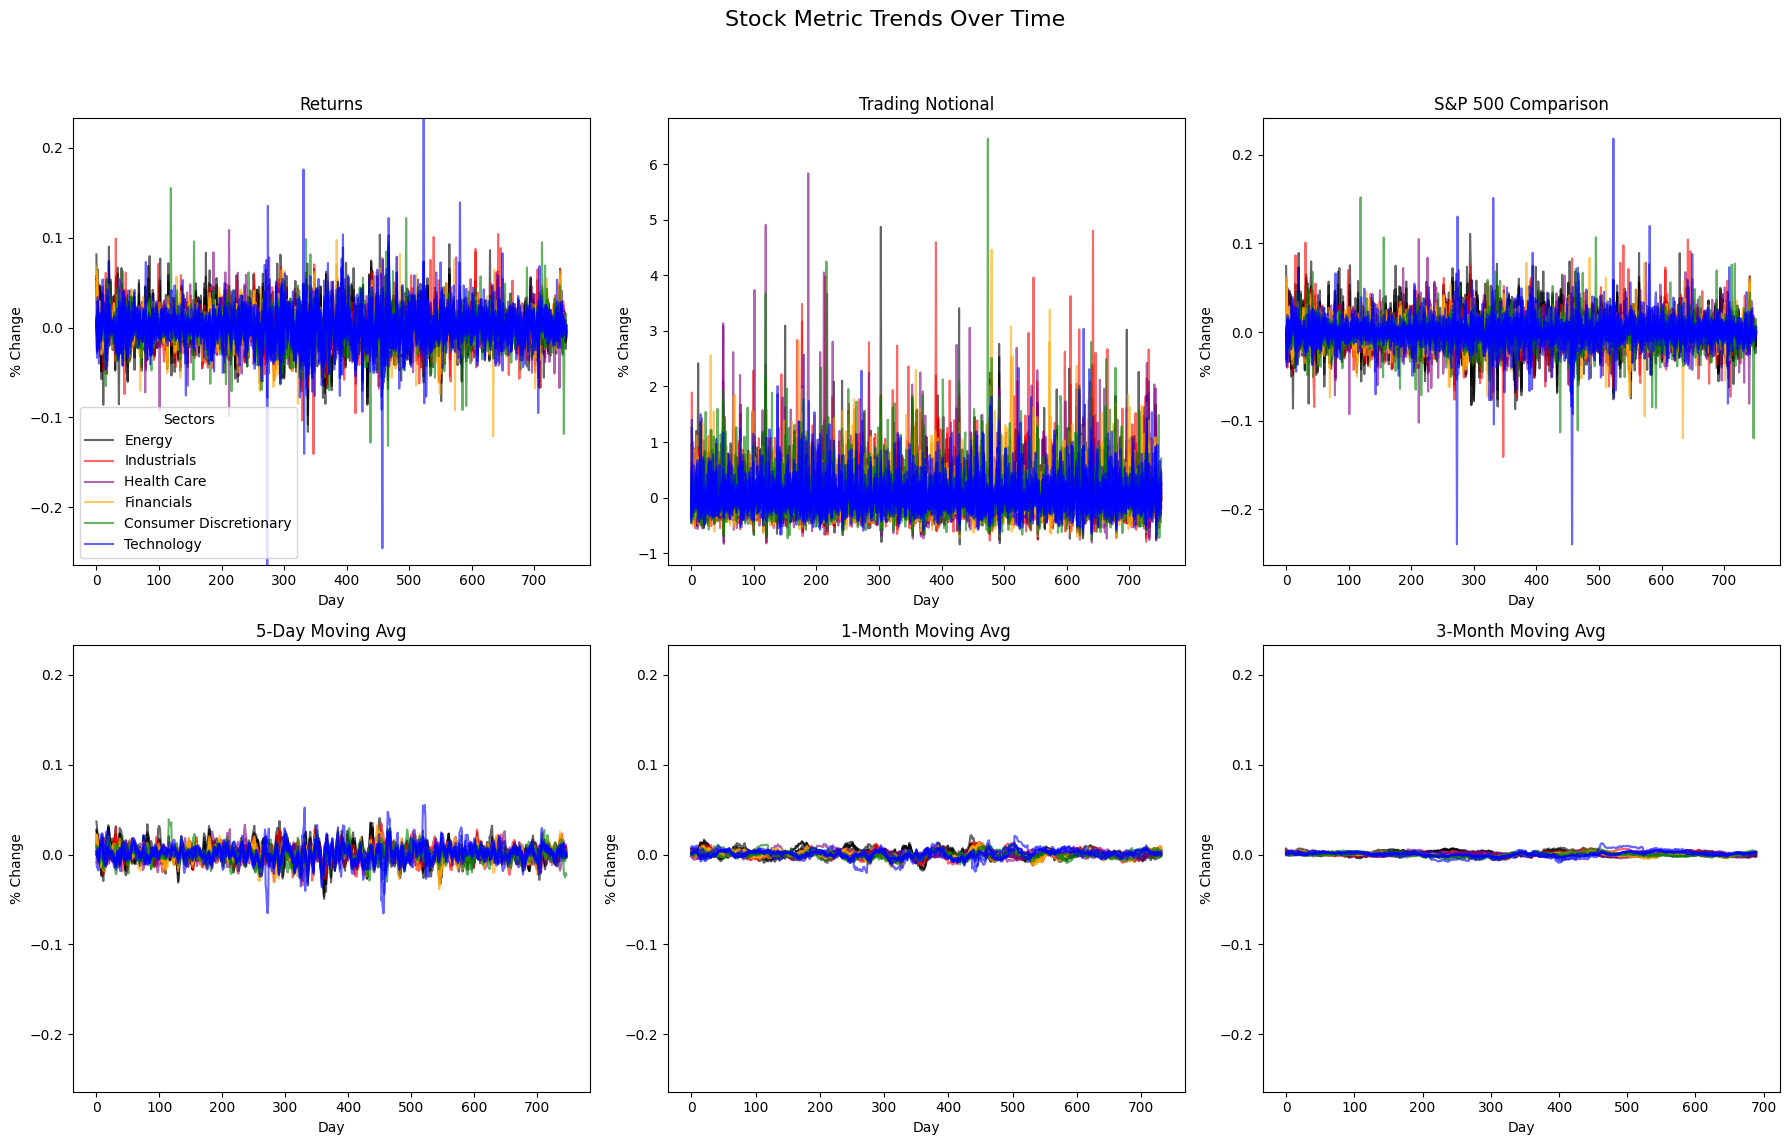

In [ ]:
def plot_stock_prices(df, title, ylab, ax, tickers, ticker_sector, sector_colors, y_min=None, y_max=None):
    # We create a set to keep track of which sectors we've already added to the legend
    sectors_in_legend = set()

    for ticker in tickers:
        sector = ticker_sector[ticker]
        color = sector_colors[sector]

        ax.plot(range(len(df[ticker])), df[ticker], label=sector if sector not in sectors_in_legend else "", color=color, alpha=0.6)

        if sector not in sectors_in_legend:
            sectors_in_legend.add(sector)

    ax.set_title(title)
    ax.set_xlabel("Day")
    ax.set_ylabel(ylab)

    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)

    if ax == axs[0, 0]:
        ax.legend(title="Sectors")

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

min_val = min(returns_df.min().min(), moving_average_5d_df.min().min(), moving_average_21d_df.min().min(), moving_average_63d_df.min().min())
max_val = max(returns_df.max().max(), moving_average_5d_df.max().max(), moving_average_21d_df.max().max(), moving_average_63d_df.max().max())

plot_stock_prices(returns_df, "Returns", "% Change", axs[0, 0], tickers, ticker_sector, sector_colors, y_min=min_val, y_max=max_val)
plot_stock_prices(volume_df, "Trading Notional", "% Change", axs[0, 1], tickers, ticker_sector, sector_colors)
plot_stock_prices(relative_returns_df, "S&P 500 Comparison", "% Change", axs[0, 2], tickers, ticker_sector, sector_colors)
plot_stock_prices(moving_average_5d_df, "5-Day Moving Avg", "% Change", axs[1, 0], tickers, ticker_sector, sector_colors, y_min=min_val, y_max=max_val)
plot_stock_prices(moving_average_21d_df, "1-Month Moving Avg", "% Change", axs[1, 1], tickers, ticker_sector, sector_colors, y_min=min_val, y_max=max_val)
plot_stock_prices(moving_average_63d_df, "3-Month Moving Avg", "% Change", axs[1, 2], tickers, ticker_sector, sector_colors, y_min=min_val, y_max=max_val)


plt.suptitle("Stock Metric Trends Over Time", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# helper functions
def compute_RBF_distance(ticker1_num, ticker2_num, sigma, df):
    series1 = df.iloc[:,ticker1_num]
    series2 = df.iloc[:,ticker2_num]
    euclidean_dist = np.linalg.norm(series1 - series2)

    return np.exp(-(euclidean_dist**2)/(2*sigma**2))

def make_adj_matrix(df):
  n_dates, n_stocks = df.shape

  # calculate adjacency matrix using RBF kernel
  adjacency_matrix = np.zeros((n_stocks, n_stocks))
  for i in range(len(adjacency_matrix)):
      for j in range(len(adjacency_matrix[i])):
          adjacency_matrix[i, j] =  compute_RBF_distance(i, j, sigma = 0.4, df=df)

  return adjacency_matrix

In [ ]:
import numpy as np
import plotly.graph_objects as go

def laplacian_1d(df, title, fig, row, col, show_legend=False):
    adjacency_matrix = make_adj_matrix(df)

    # Compute Laplacian matrix
    degree_matrix = np.diag(adjacency_matrix.sum(axis=1))
    laplacian = degree_matrix - adjacency_matrix

    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian)

    # 1D projection using the second smallest eigenvalue
    selected_eigenvector = eigenvectors[:, 1]

    # Organize data by sectors
    sector_data = {sector: [] for sector in set(ticker_sector.values())}
    for i, ticker in enumerate(tickers):
        sector = ticker_sector[ticker]
        sector_data[sector].append(selected_eigenvector[i])

    # Plot data
    for sector, data in sector_data.items():
        fig.add_trace(
            go.Scatter(
                x=data, y=[0] * len(data),  # Plotting on a 1D line (y=0)
                mode='markers+text',
                text=[ticker for ticker in tickers if ticker_sector[ticker] == sector],
                name=sector,
                marker=dict(color=sector_colors[sector]),
                textposition='top center',
                showlegend=show_legend
            ),
            row=row, col=col
        )

    # Update axes properties
    fig.update_xaxes(title_text="Eigenvector 2 (1D Projection)", row=row, col=col)
    fig.update_yaxes(title_text="", showticklabels=False, row=row, col=col)  # Hide y-axis

    # Set plot title
    fig.update_layout(title_text=title)


In [ ]:
def laplacian_2d(df, title, fig, row, col, show_legend=False, label=True):
    adjacency_matrix = make_adj_matrix(df)

    # compute LaPlacian matrix
    degree_matrix = np.diag(adjacency_matrix.sum(axis=1))
    laplacian = degree_matrix - adjacency_matrix

    # eigval decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian)

    # 2D projection
    selected_eigenvectors = eigenvectors[:, 1:3]

    # organize data by sectors
    sector_data = {sector: {'x': [], 'y': []} for sector in set(ticker_sector.values())}
    for i, ticker in enumerate(tickers):
        sector = ticker_sector[ticker]
        sector_data[sector]['x'].append(selected_eigenvectors[i, 0])
        sector_data[sector]['y'].append(selected_eigenvectors[i, 1])

    if label:
        for sector, data in sector_data.items():
            fig.add_trace(
                go.Scatter(
                    x=data['x'], y=data['y'],
                    mode='markers',
                    text=[ticker for ticker in tickers if ticker_sector[ticker] == sector],
                    name=sector,
                    marker=dict(color=sector_colors[sector]),
                    textposition='top center',
                    #textfont=dict(size=10),  # Adjust the 'size' value as needed
                    showlegend=show_legend
                ),
                row=row, col=col
            )
    else:
        for sector, data in sector_data.items():
            fig.add_trace(
                go.Scatter(
                    x=data['x'], y=data['y'],
                    mode='markers',
                    name=sector,
                    marker=dict(color=sector_colors[sector]),
                    textfont=dict(size=10),  # Adjust the 'size' value as needed
                    showlegend=show_legend
                ),
                row=row, col=col
            )

    fig.update_xaxes(title_text="Eigenvector 2", row=row, col=col)
    fig.update_yaxes(title_text="Eigenvector 3", row=row, col=col)


In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=(RETURNS_TITLE, VOLUME_TITLE, SP500_TITLE, DAYS5_TITLE, MONTHS1_TITLE, MONTHS3_TITLE)
)

laplacian_2d(returns_df, RETURNS_TITLE, fig, 1, 1)
laplacian_2d(volume_df, VOLUME_TITLE, fig, 1, 2)
laplacian_2d(relative_returns_df, SP500_TITLE, fig, 1, 3)
laplacian_2d(moving_average_5d_df, DAYS5_TITLE, fig, 2, 1)
laplacian_2d(moving_average_21d_df, MONTHS1_TITLE, fig, 2, 2)
laplacian_2d(moving_average_63d_df, MONTHS3_TITLE, fig, 2, 3, True)

fig.update_layout(height=800, width=1400, title_text="2D Projection using Laplacian Eigenmaps", showlegend=True)

# save at interactive HTML
if SAVE_FIGS:
  fig.write_html('2DLaplacians.html')

fig.show()

In [ ]:
def laplacian_3d(df, title, fig, row, col, show_legend=False):
  '''HAND IMPLEMENTATION OF LAPLACIAN EIGENMAPS IN 3D'''

  adjacency_matrix = make_adj_matrix(df)

  # compute LaPlacian matrix
  degree_matrix = np.diag(adjacency_matrix.sum(axis=1))
  laplacian = degree_matrix - adjacency_matrix

  # eigval decomposition
  eigenvalues, eigenvectors = np.linalg.eigh(laplacian)

  # 3D proejction
  selected_eigenvectors = eigenvectors[:, 1:4]  # 1st eigenvec is constant, so select the 2nd, 3rd, & 4th

  sector_data_3d = {sector: {'x': [], 'y': [], 'z': []} for sector in set(ticker_sector.values())}
  for i, ticker in enumerate(tickers):
      sector = ticker_sector[ticker]
      sector_data_3d[sector]['x'].append(selected_eigenvectors[i, 0])
      sector_data_3d[sector]['y'].append(selected_eigenvectors[i, 1])
      sector_data_3d[sector]['z'].append(selected_eigenvectors[i, 2])
      #sector_data_3d[sector]['text'].append(ticker)

  # figure and add traces for each sector
  for sector, data in sector_data_3d.items():
      fig.add_trace(
        go.Scatter3d(
          x=data['x'],
          y=data['y'],
          z=data['z'],
          mode='markers+text',
          text=[ticker for ticker in tickers if ticker_sector[ticker] == sector],
          name=sector,
          marker=dict(color=sector_colors[sector], size=5),
          textposition='top center',
          showlegend=show_legend
        ),
        row=row, col=col
      )

  fig.update_scenes(
        xaxis_title_text='Eigenvector 2',
        yaxis_title_text='Eigenvector 3',
        zaxis_title_text='Eigenvector 4',
        row=row, col=col
    )

In [ ]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter'}]],
    subplot_titles=("Returns",)
)

laplacian_2d(returns_df, "Returns", fig, 1, 1)

fig.update_layout(height=800, width=1400, title_text="1D Projection using Laplacian Eigenmaps", showlegend=True)

if SAVE_FIGS:
  fig.write_html('3DLaplacian.html')

fig.show()


In [ ]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter3d'}]],
    subplot_titles=("Returns",)
)

laplacian_3d(returns_df, "Returns", fig, 1, 1)

fig.update_layout(height=800, width=1400, title_text="3D Projection using Laplacian Eigenmaps", showlegend=True)

if SAVE_FIGS:
  fig.write_html('3DLaplacian.html')

fig.show()


In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=(RETURNS_TITLE, VOLUME_TITLE, SP500_TITLE, DAYS5_TITLE, MONTHS1_TITLE, MONTHS3_TITLE)
)

# Populate the subplots
laplacian_3d(returns_df, RETURNS_TITLE, fig, 1, 1)
laplacian_3d(volume_df, VOLUME_TITLE, fig, 1, 2)
laplacian_3d(relative_returns_df, SP500_TITLE, fig, 1, 3)
laplacian_3d(moving_average_5d_df, DAYS5_TITLE, fig, 2, 1)
laplacian_3d(moving_average_21d_df, MONTHS1_TITLE, fig, 2, 2)
laplacian_3d(moving_average_63d_df, MONTHS3_TITLE, fig, 2, 3, True)  # Only show legend here

# Adjust layout and display the figure
fig.update_layout(height=800, width=1400, title_text="3D Projection using Laplacian Eigenmaps", showlegend=True)

# save as interactive HTML
if SAVE_FIGS:
  fig.write_html('3DLaplacians.html')

fig.show()

# Consistency Analysis - Ian's Space

In [ ]:
returns_df.head()

Ticker,XOM,CVX,COP,SLB,EOG,CAT,MMM,GE,DE,UNP,...,STT,DIS,NKE,SBUX,LOW,AAPL,MSFT,AMZN,GOOGL,META
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.048193,0.027033,0.057367,0.053758,0.081428,0.008180,-0.001688,0.028653,0.024810,0.012266,...,0.005952,0.004277,0.008066,0.003298,0.003367,0.012364,0.000965,0.010004,0.008064,0.007548
2021-01-06,0.025517,0.032184,0.039914,0.055339,0.021142,0.055653,0.015212,0.054782,0.058626,0.020925,...,0.068107,0.003811,0.007931,0.007251,0.013361,-0.033662,-0.025929,-0.024897,-0.009868,-0.028269
2021-01-07,0.007846,0.004677,0.027350,0.019254,0.064657,0.001909,-0.025662,-0.007922,0.032270,0.013918,...,0.001288,-0.003015,0.018265,-0.008062,0.003925,0.034123,0.028457,0.007577,0.029869,0.020622
2021-01-08,0.011121,0.009532,0.000000,-0.001608,0.004265,0.000154,-0.018265,0.006211,-0.019417,0.028676,...,-0.007719,0.000616,0.009659,0.022448,0.008185,0.008631,0.006093,0.006496,0.013239,-0.004354
2021-01-11,0.030356,0.005709,0.014765,0.006039,0.012570,-0.002059,-0.008522,0.009700,0.003436,-0.006718,...,0.013095,0.002238,0.004783,-0.010126,0.007695,-0.023249,-0.009699,-0.021519,-0.023106,-0.040102


In [ ]:
# Split the table into subtables:
# For each year, [Q1-Q3, Q4]

dates = []     # Stores titles for each subtable
subtables = [] # Stores subtables

for year in range(returns_df.index.year.min(), returns_df.index.year.max() + 1):
    # Populate date labels
    dates.append([f"{year} Q1-Q3", f"{year} Q4"])

    # First 9 months of the year
    first_9_months_mask = (returns_df.index.year == year) & (returns_df.index.month <= 8)
    subtable_first_9_months = returns_df[first_9_months_mask]

    # Last 3 months of the year
    last_3_months_mask = (returns_df.index.year == year) & (returns_df.index.month > 8)
    subtable_last_3_months = returns_df[last_3_months_mask]

    subtables.append([subtable_first_9_months, subtable_last_3_months])

In [ ]:
np.array(dates).T.flatten().tolist()

['2021 Q1-Q3', '2022 Q1-Q3', '2023 Q1-Q3', '2021 Q4', '2022 Q4', '2023 Q4']

In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=np.array(dates).T.flatten().tolist()
)

# Populate the subplots
for i, j in np.ndindex((2, 3)):
  laplacian_3d(subtables[j][i], dates[j][i], fig, i+1, j+1)

# Adjust layout and display the figure
fig.update_layout(height=800, width=1400, title_text="3D Projection using Laplacian Eigenmaps", showlegend=True)

# save as interactive HTML
fig.write_html('3DLaplacians_Consistency_Analysis.html')

fig.show()

Ok now just try two graphs, 2021+2022 vs 2023

In [ ]:
df_2021_2022 = returns_df[(returns_df.index.year == 2021) | (returns_df.index.month == 2022)]
df_2023 = returns_df[(returns_df.index.year == 2023)]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=["2021-2022", "2023"]
)

# Populate the subplots
laplacian_3d(df_2021_2022, "2021-2022", fig, 1, 1)
laplacian_3d(df_2023, "2023", fig, 1, 2)


# Adjust layout and display the figure
fig.update_layout(height=800, width=1400, title_text="3D Projection using Laplacian Eigenmaps", showlegend=True)

# save as interactive HTML
fig.write_html('3DLaplacians_Consistency_Analysis_2yr_1yr.html')

fig.show()

# - end consistency analysis -

In [ ]:
def kernel_heatmap(df, title, ax):
  '''
  Heatmap of RBF Distance
  '''

  # Assume make_adj_matrix is a function that computes the RBF kernel matrix
  adjacency_matrix = make_adj_matrix(df)

  # Plotting the heatmap on the specified Axes object
  sns.heatmap(adjacency_matrix, cmap='viridis', ax=ax)
  ax.set_title(title)

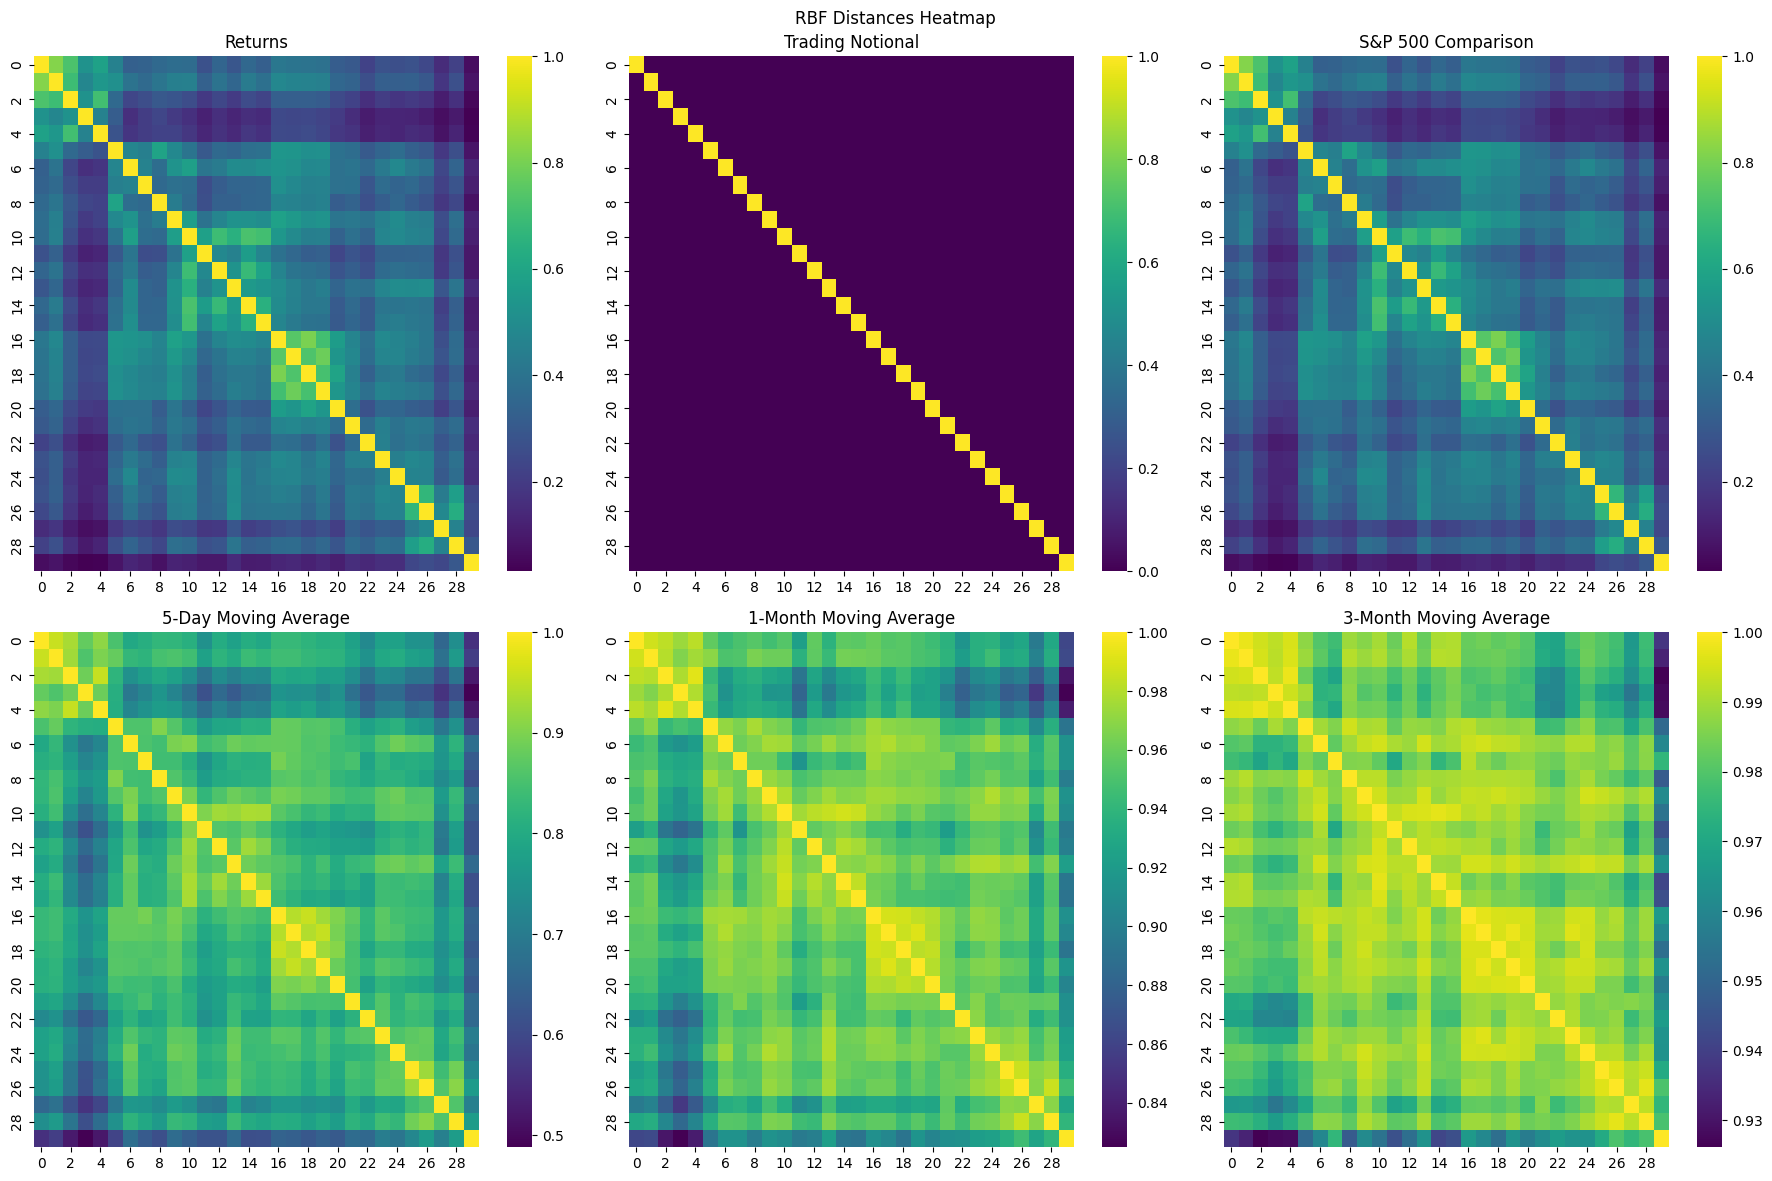

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

kernel_heatmap(returns_df, 'Returns', axs[0, 0])
kernel_heatmap(volume_df, VOLUME_TITLE, axs[0, 1])
kernel_heatmap(relative_returns_df, 'S&P 500 Comparison', axs[0, 2])
kernel_heatmap(moving_average_5d_df, '5-Day Moving Average', axs[1, 0])
kernel_heatmap(moving_average_21d_df, '1-Month Moving Average', axs[1, 1])
kernel_heatmap(moving_average_63d_df, '3-Month Moving Average', axs[1, 2])

plt.suptitle("RBF Distances Heatmap")
plt.tight_layout()

# Save the figure
if SAVE_FIGS:
  plt.savefig('heatmaps.png', dpi=300)

plt.show()


In [ ]:
!pip install umap-learn
!pip install phate

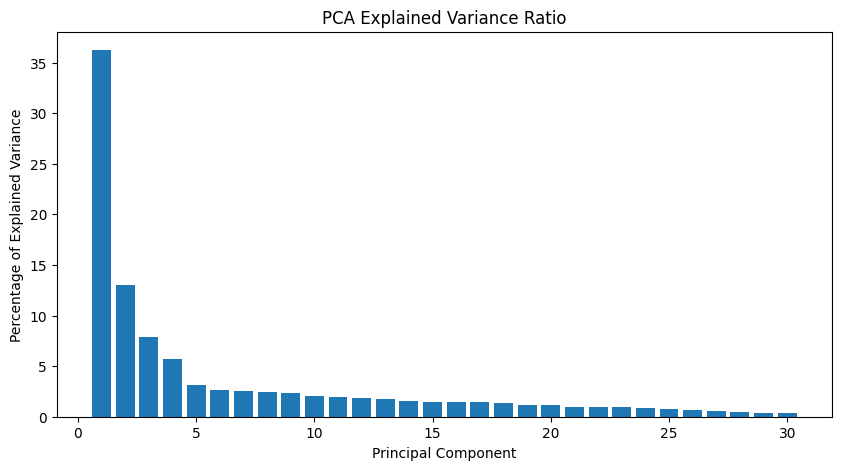

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns_df)

pca = PCA()
pca.fit(returns_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PCA Explained Variance Ratio')
plt.show()

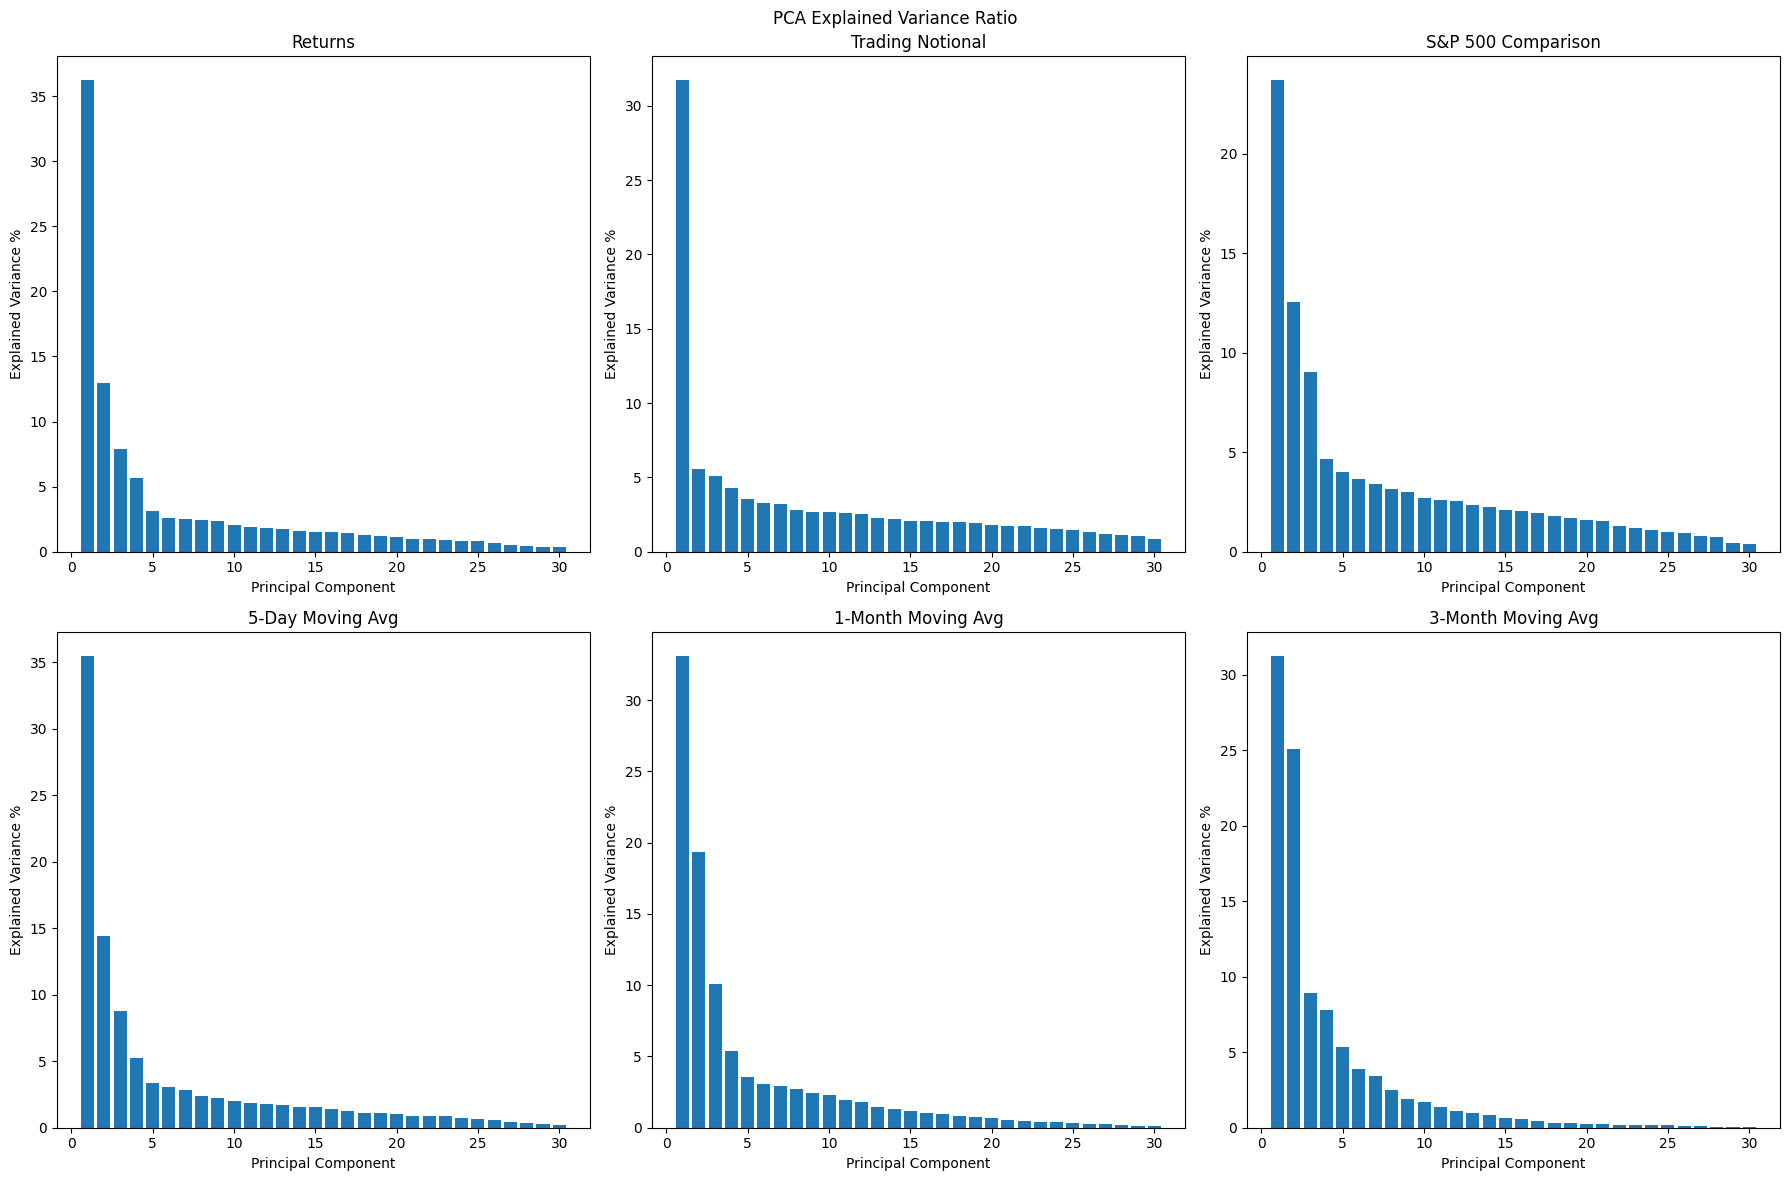

In [ ]:
def plot_explained_variance(df, title, ax):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    pca = PCA()
    pca.fit(df_scaled)

    explained_variance = pca.explained_variance_ratio_

    ax.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
    ax.set_ylabel('Explained Variance %')
    ax.set_xlabel('Principal Component')
    ax.set_title(title)

# Set up a 2x3 subplot
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
datasets_titles = [
    (returns_df, RETURNS_TITLE),
    (volume_df, VOLUME_TITLE),
    (relative_returns_df, SP500_TITLE),
    (moving_average_5d_df, DAYS5_TITLE),
    (moving_average_21d_df, MONTHS1_TITLE),
    (moving_average_63d_df, MONTHS3_TITLE)
]

# Iterate over your datasets and titles, plotting each on a subplot
for ax, (dataset, title) in zip(axs.flatten(), datasets_titles):
    plot_explained_variance(dataset, title, ax)

fig.suptitle('PCA Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [ ]:
import umap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
import phate
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:

# OLD FUNCTION ( USE NEXT CELL! )
colors = [sector_colors[ticker_sector[ticker]] for ticker in tickers]
sector_legend = [mpatches.Patch(color=color, label=sector) for sector, color in sector_colors.items()]

def embeddings(df, title):
  # get phate embedding
  phate_embedding = phate.PHATE().fit_transform(df)

  # get umap embedding
  umap_embedding = umap.UMAP(n_components=2).fit_transform(df)

  n_samples = df.shape[0]

  # Set perplexity to a value less than n_samples
  tsne_embedding = TSNE(n_components=2, perplexity=n_samples-1).fit_transform(df)

  # Run isomaps
  isomap_embedding = Isomap(n_components=2).fit_transform(df)

  # get diffusion map embedding
  diffusion_embedding = SpectralEmbedding(n_components=2).fit_transform(df)

  # get pca embedding
  pca_embedding = PCA(n_components=2).fit_transform(df)

  # Plot all embeddings in a subplot
  fig, axs = plt.subplots(2, 3, figsize=(15, 10))

  axs[0, 0].scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=colors)
  axs[0, 0].set_title('PCA')

  axs[0, 1].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=colors)
  axs[0, 1].set_title('t-SNE')

  axs[0, 2].scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=colors)
  axs[0, 2].set_title('PHATE')
  axs[0, 2].legend(handles=sector_legend, title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')

  axs[1, 0].scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=colors)
  axs[1, 0].set_title('UMAP')

  axs[1, 1].scatter(diffusion_embedding[:, 0], diffusion_embedding[:, 1], c=colors)
  axs[1, 1].set_title('Diffusion Maps')

  axs[1, 2].scatter(isomap_embedding[:, 0], isomap_embedding[:, 1], c=colors)
  axs[1, 2].set_title('Isomaps')

  fig.suptitle(f"Visualization of Embeddings ({title})")

  plt.tight_layout()

  if SAVE_FIGS:
    plt.savefig(f'embeddings({title}).png', dpi=300)

  plt.show()

Calculating PHATE...
  Running PHATE on 30 observations and 752 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating optimal t...
    Automatically selected t = 35
  Calculated optimal t in 0.03 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.02 seconds.
Calculated PHATE in 0.12 seconds.


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 752) is expensive. Consider setting n_pca.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



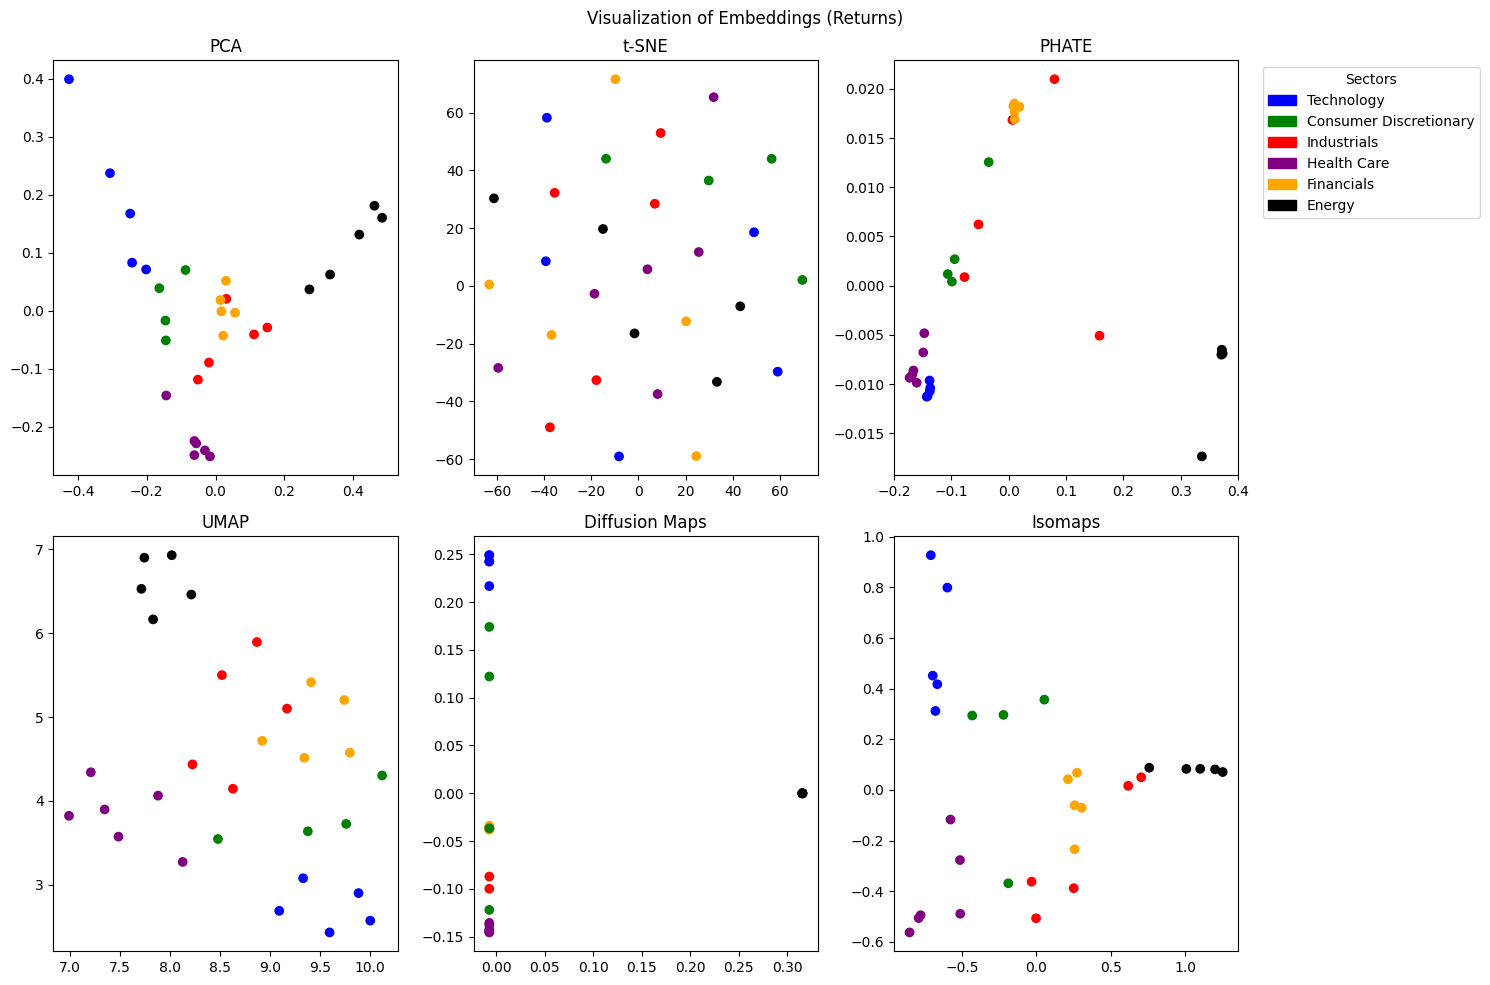

Calculating PHATE...
  Running PHATE on 30 observations and 752 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating optimal t...
    Automatically selected t = 6
  Calculated optimal t in 0.03 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.02 seconds.
Calculated PHATE in 0.18 seconds.


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 752) is expensive. Consider setting n_pca.



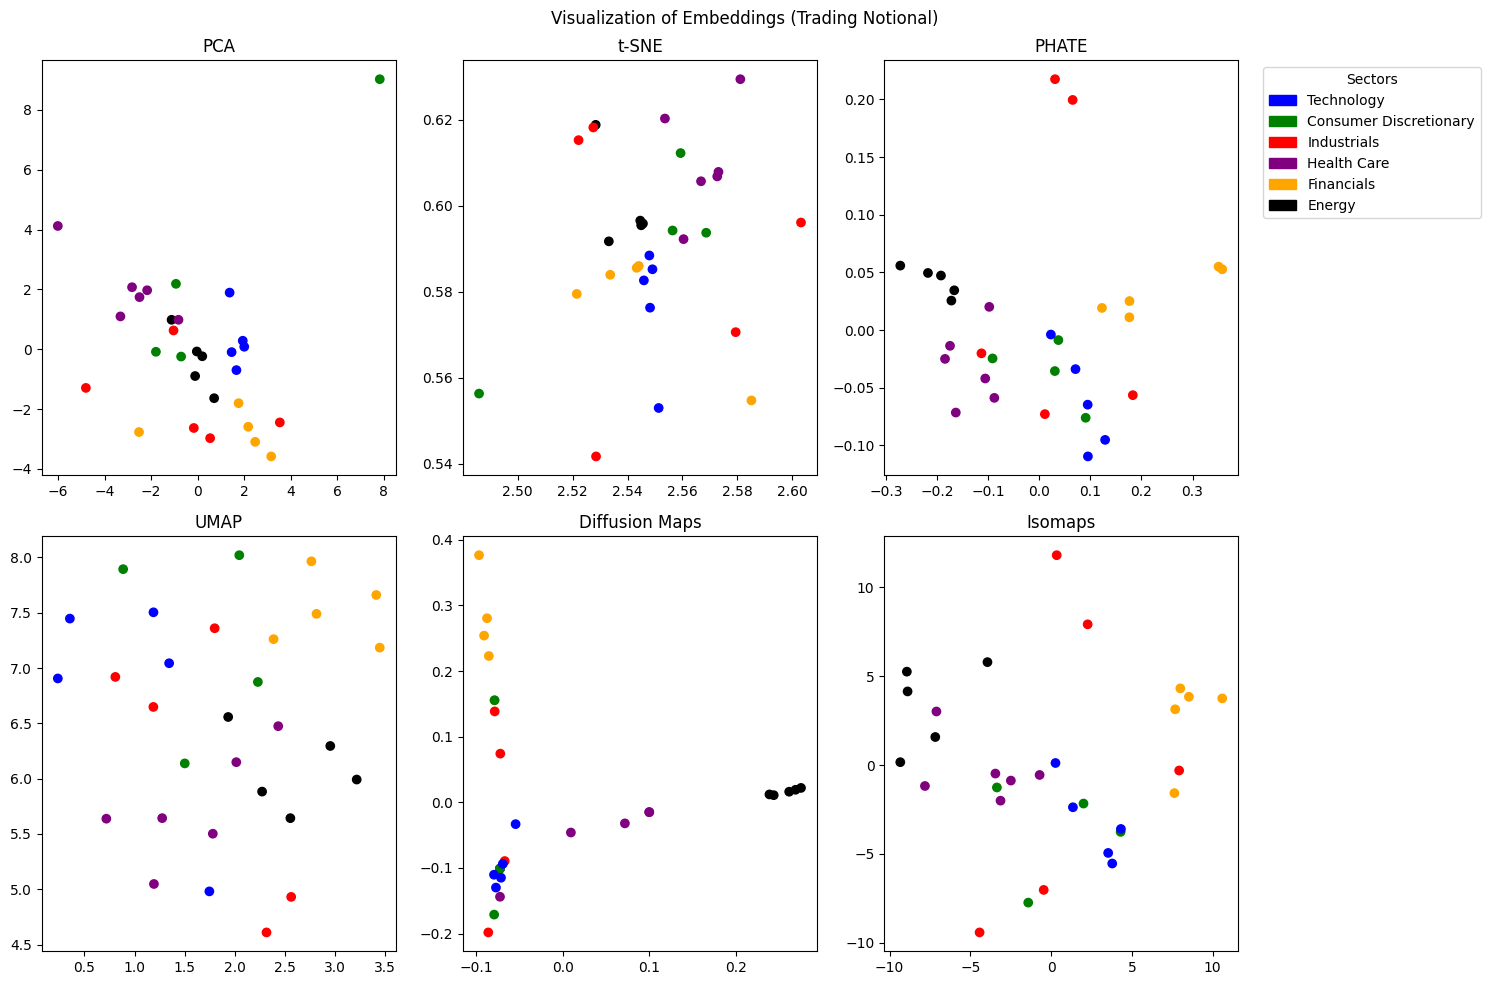

Calculating PHATE...
  Running PHATE on 30 observations and 752 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating optimal t...
    Automatically selected t = 35
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.11 seconds.


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 752) is expensive. Consider setting n_pca.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



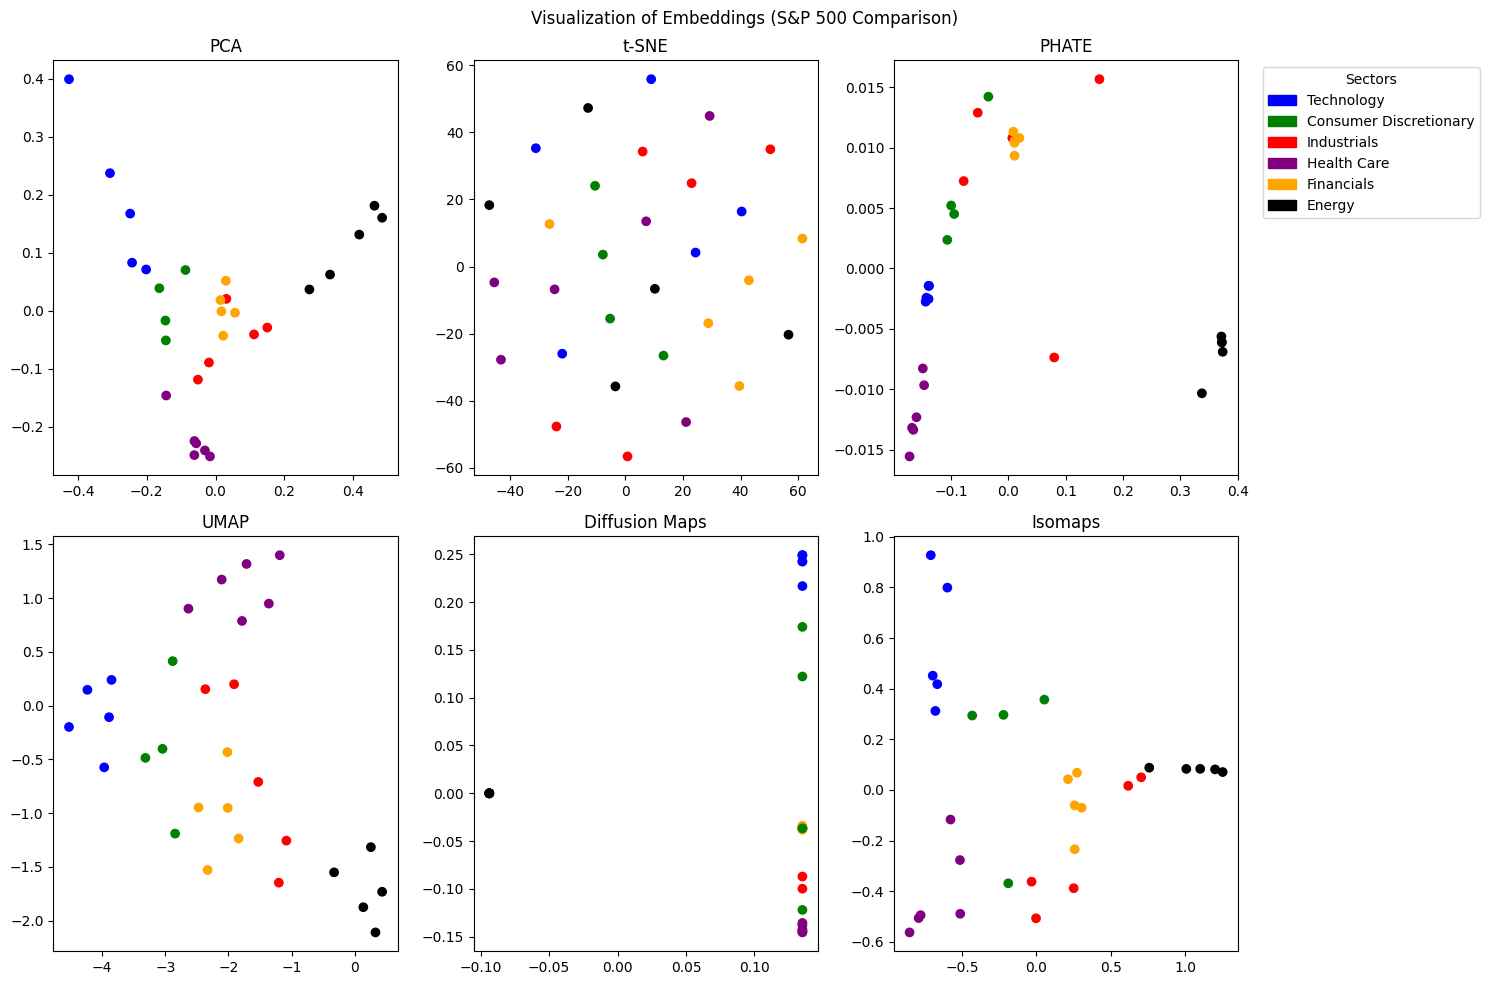

Calculating PHATE...
  Running PHATE on 30 observations and 748 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating optimal t...
    Automatically selected t = 40
  Calculated optimal t in 0.03 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.10 seconds.


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 748) is expensive. Consider setting n_pca.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



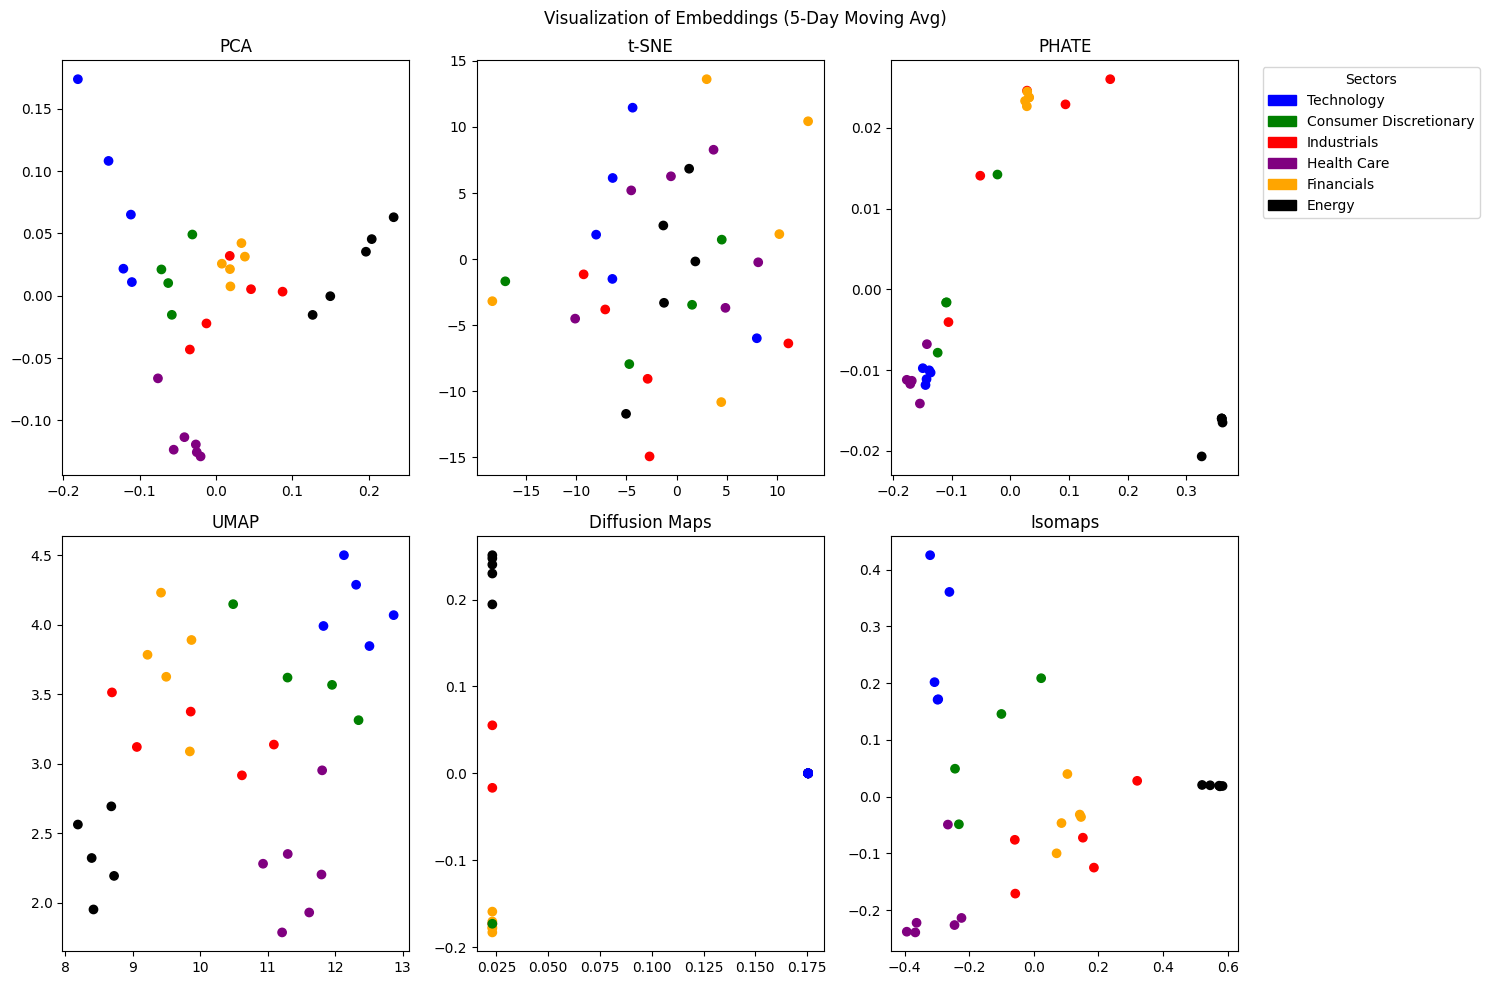

Calculating PHATE...
  Running PHATE on 30 observations and 732 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 34
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.01 seconds.
Calculated PHATE in 0.09 seconds.


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 732) is expensive. Consider setting n_pca.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



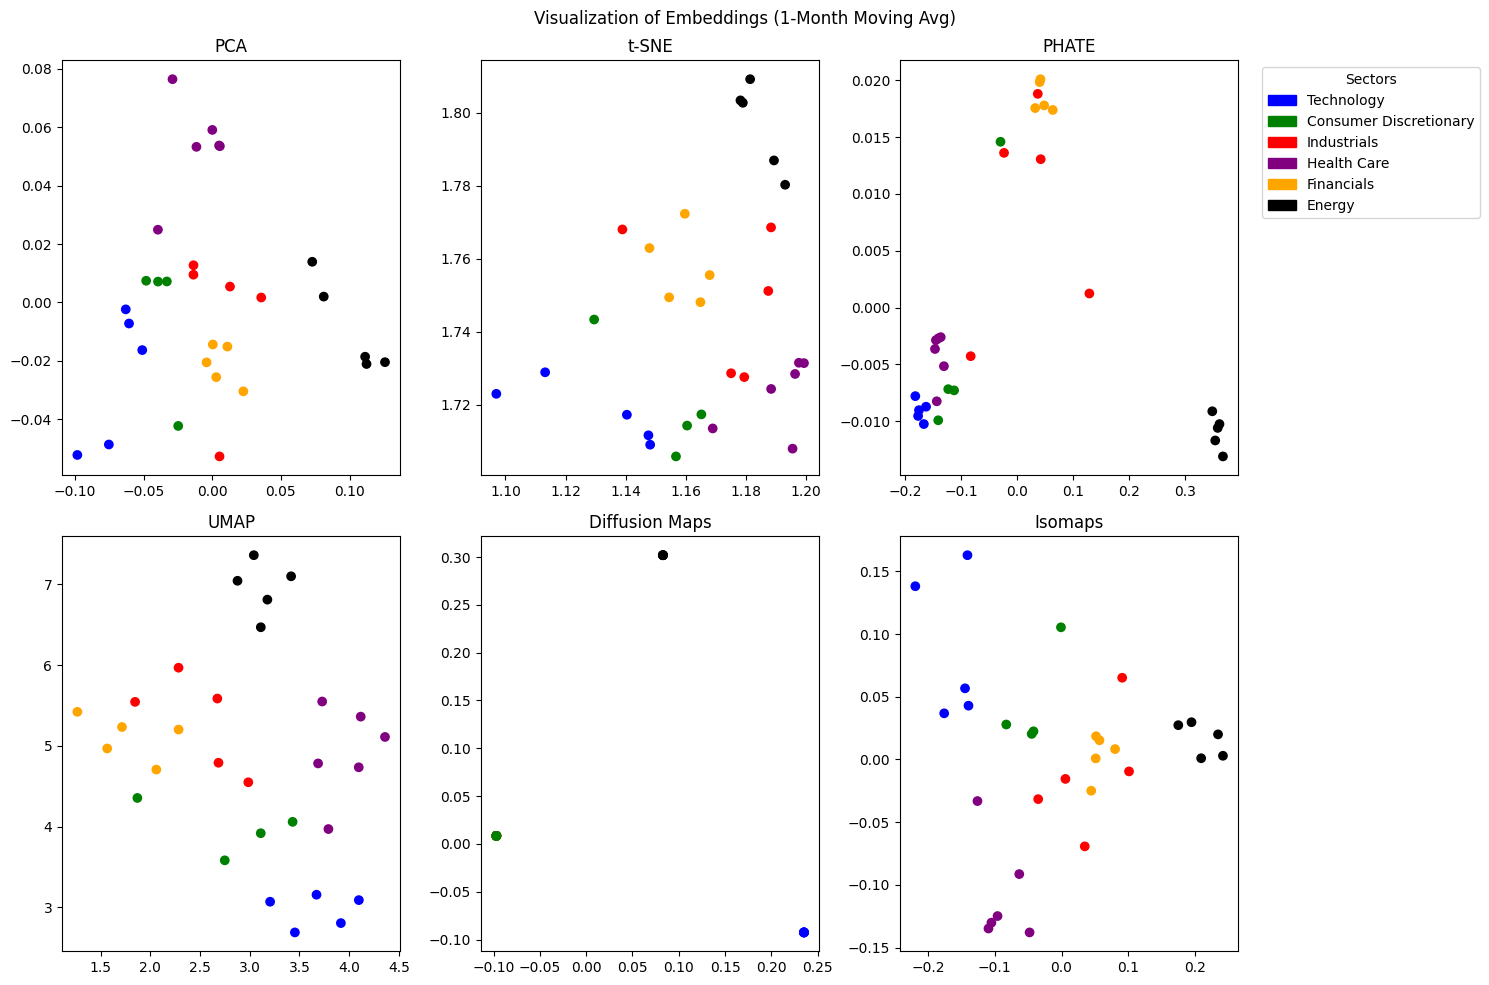

Calculating PHATE...
  Running PHATE on 30 observations and 690 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.02 seconds.
Calculated PHATE in 0.11 seconds.


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 690) is expensive. Consider setting n_pca.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



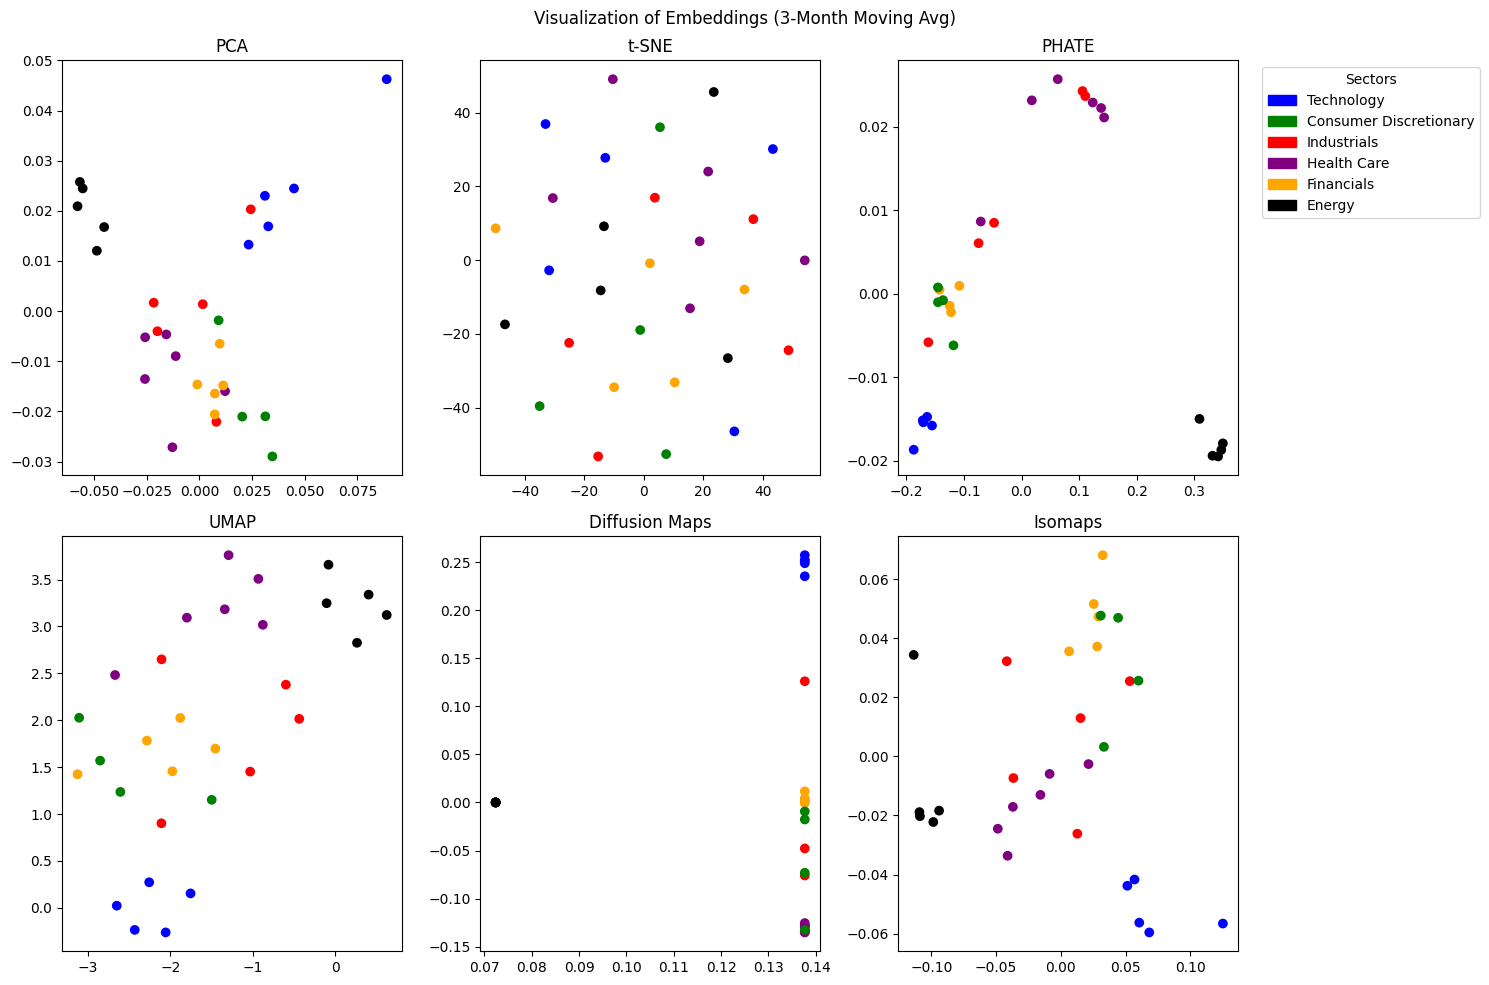

In [ ]:
embeddings(returns_df.T, RETURNS_TITLE)
embeddings(volume_df.T, VOLUME_TITLE)
embeddings(relative_returns_df.T, SP500_TITLE)
embeddings(moving_average_5d_df.T, DAYS5_TITLE)
embeddings(moving_average_21d_df.T, MONTHS1_TITLE)
embeddings(moving_average_63d_df.T, MONTHS3_TITLE)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

<ipython-input-245-ad6a2c31fb07>:40: Use

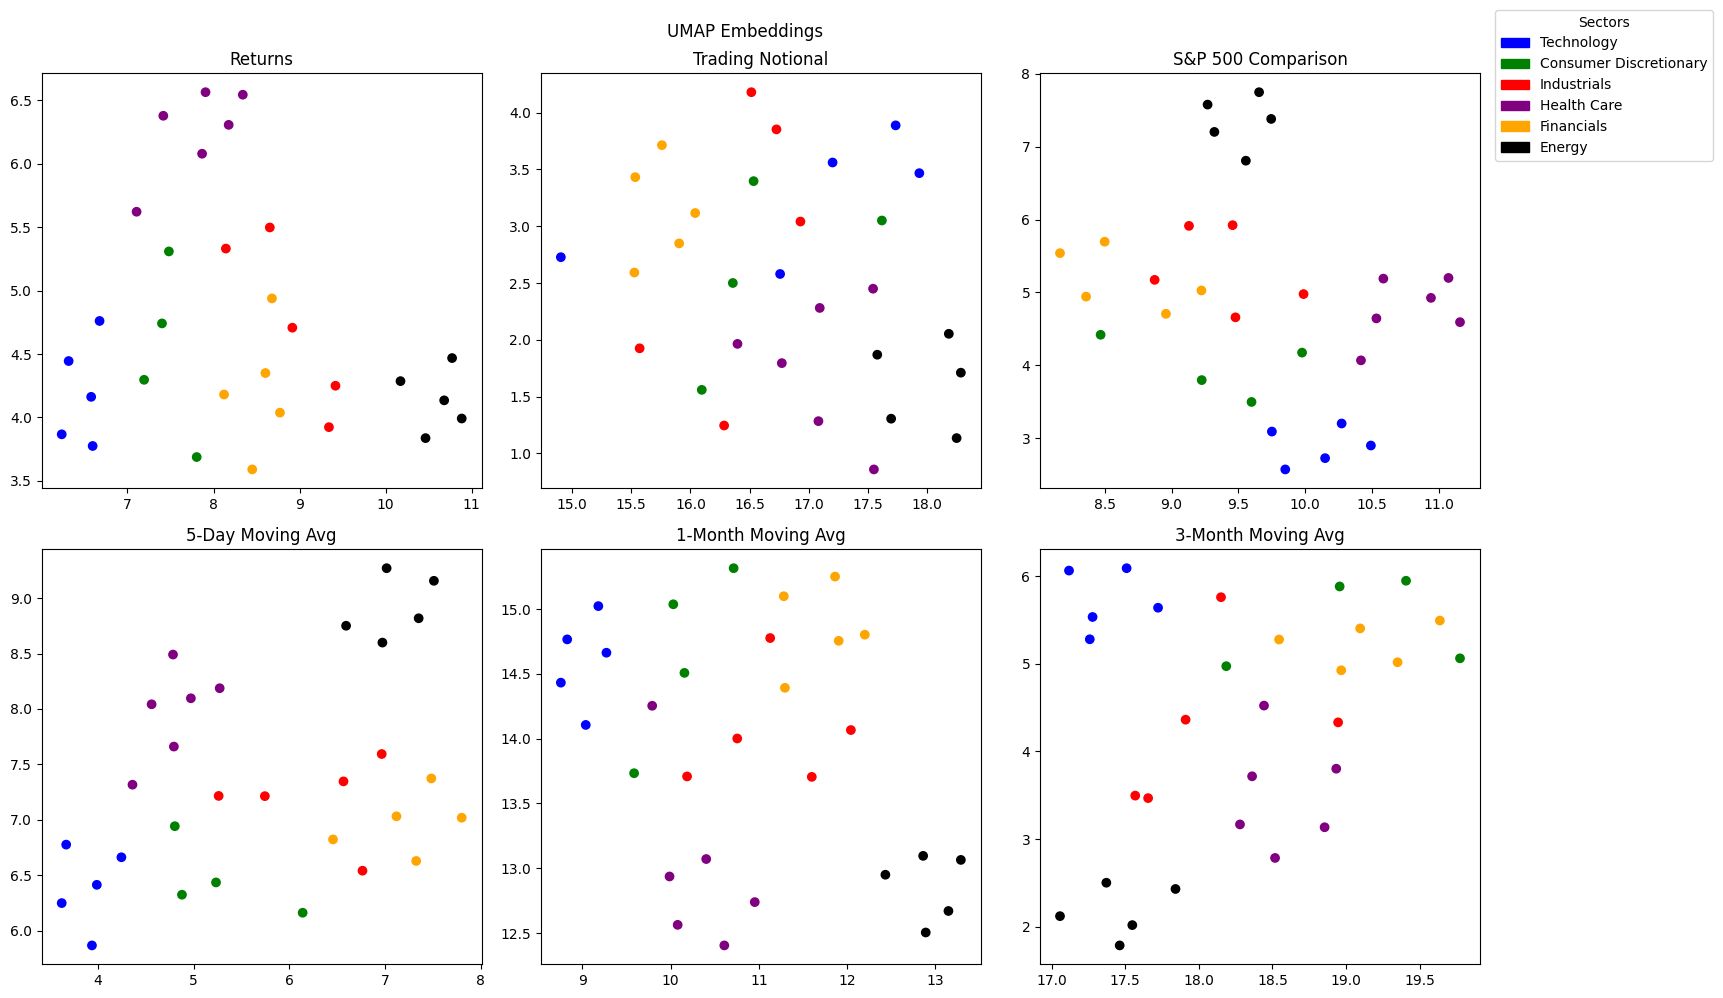

<ipython-input-245-ad6a2c31fb07>:40: UserWarning:

The figure layout has changed to tight



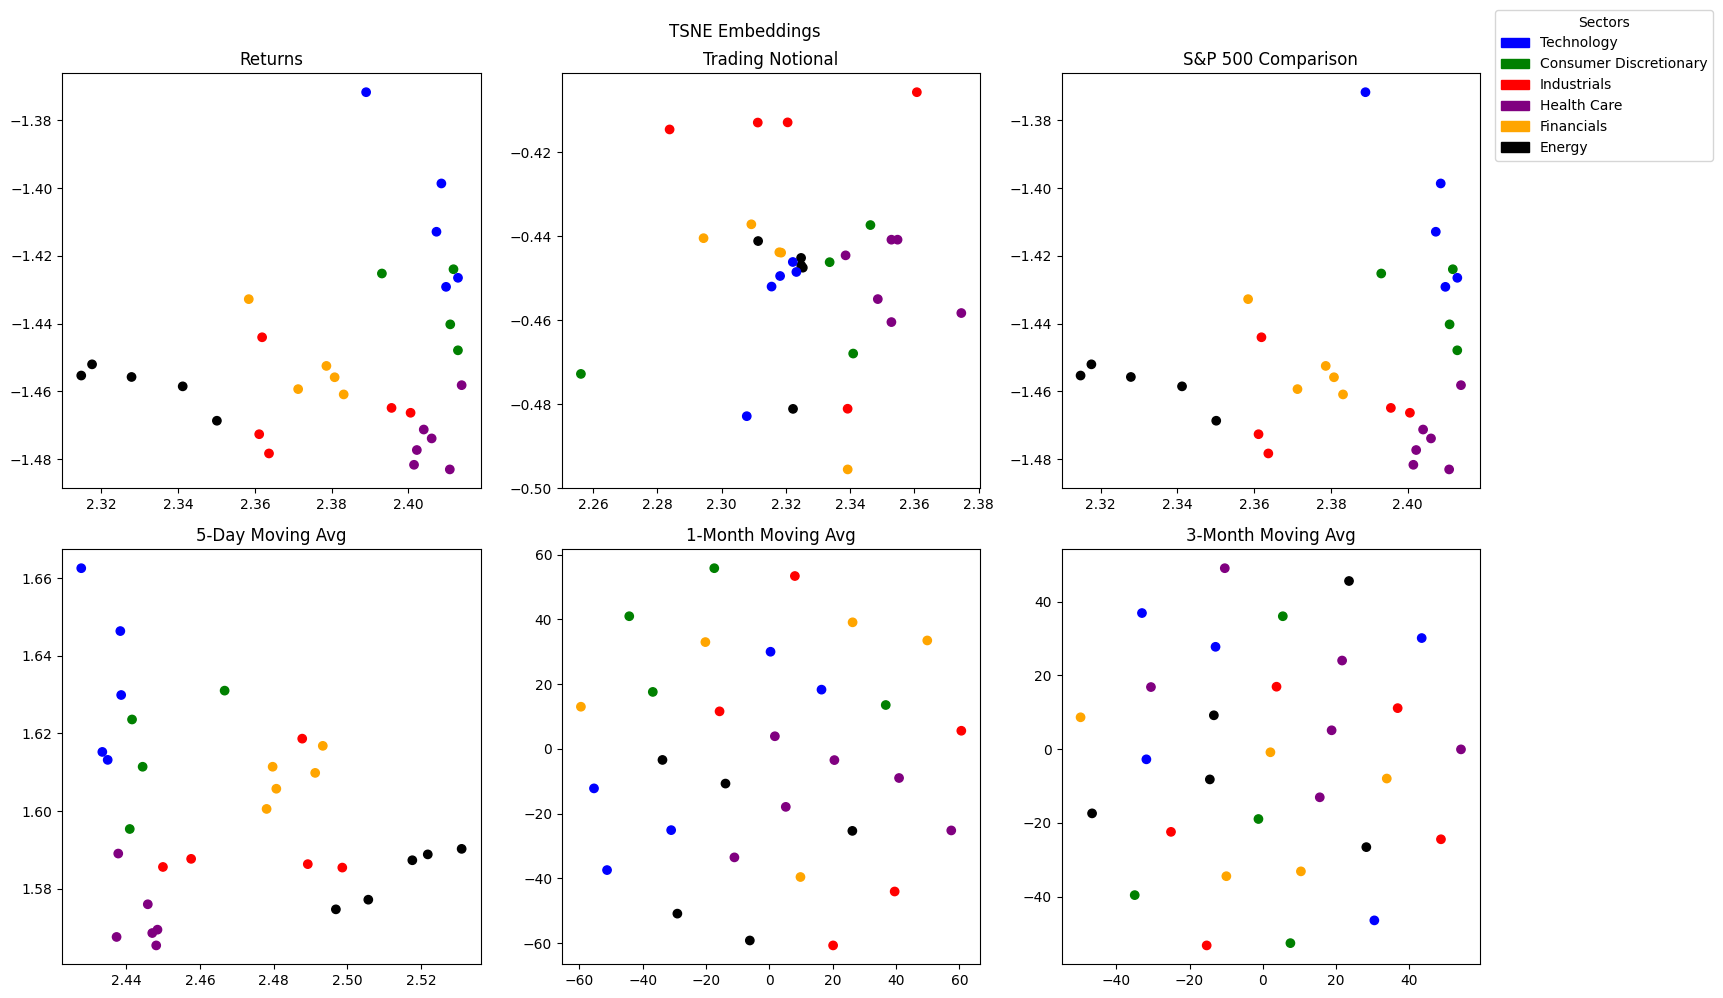

Calculating PHATE...
  Running PHATE on 30 observations and 752 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 35
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.05 seconds.
Calculating PHATE...
  Running PHATE on 30 observations and 752 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.02 seconds.
  Calculating optimal t...
    Automatically selected t = 6
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.05 seconds.
Calculating PHATE...
  Running PHATE on 30 observations and 752 variables.
  Calculating graph and diffusion operator...


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 752) is expensive. Consider setting n_pca.

/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 752) is expensive. Consider setting n_pca.

/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 752) is expensive. Consider setting n_pca.

/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 748) is expensive. Consider setting n_pca.



  Calculating optimal t...
    Automatically selected t = 40
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.01 seconds.
Calculated PHATE in 0.05 seconds.
Calculating PHATE...
  Running PHATE on 30 observations and 732 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.02 seconds.
  Calculating optimal t...
    Automatically selected t = 34
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.05 seconds.
Calculating PHATE...
  Running PHATE on 30 observations and 690 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculating diff

/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 732) is expensive. Consider setting n_pca.

/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning:

Building a kNNGraph on data of shape (30, 690) is expensive. Consider setting n_pca.

<ipython-input-245-ad6a2c31fb07>:40: UserWarning:

The figure layout has changed to tight



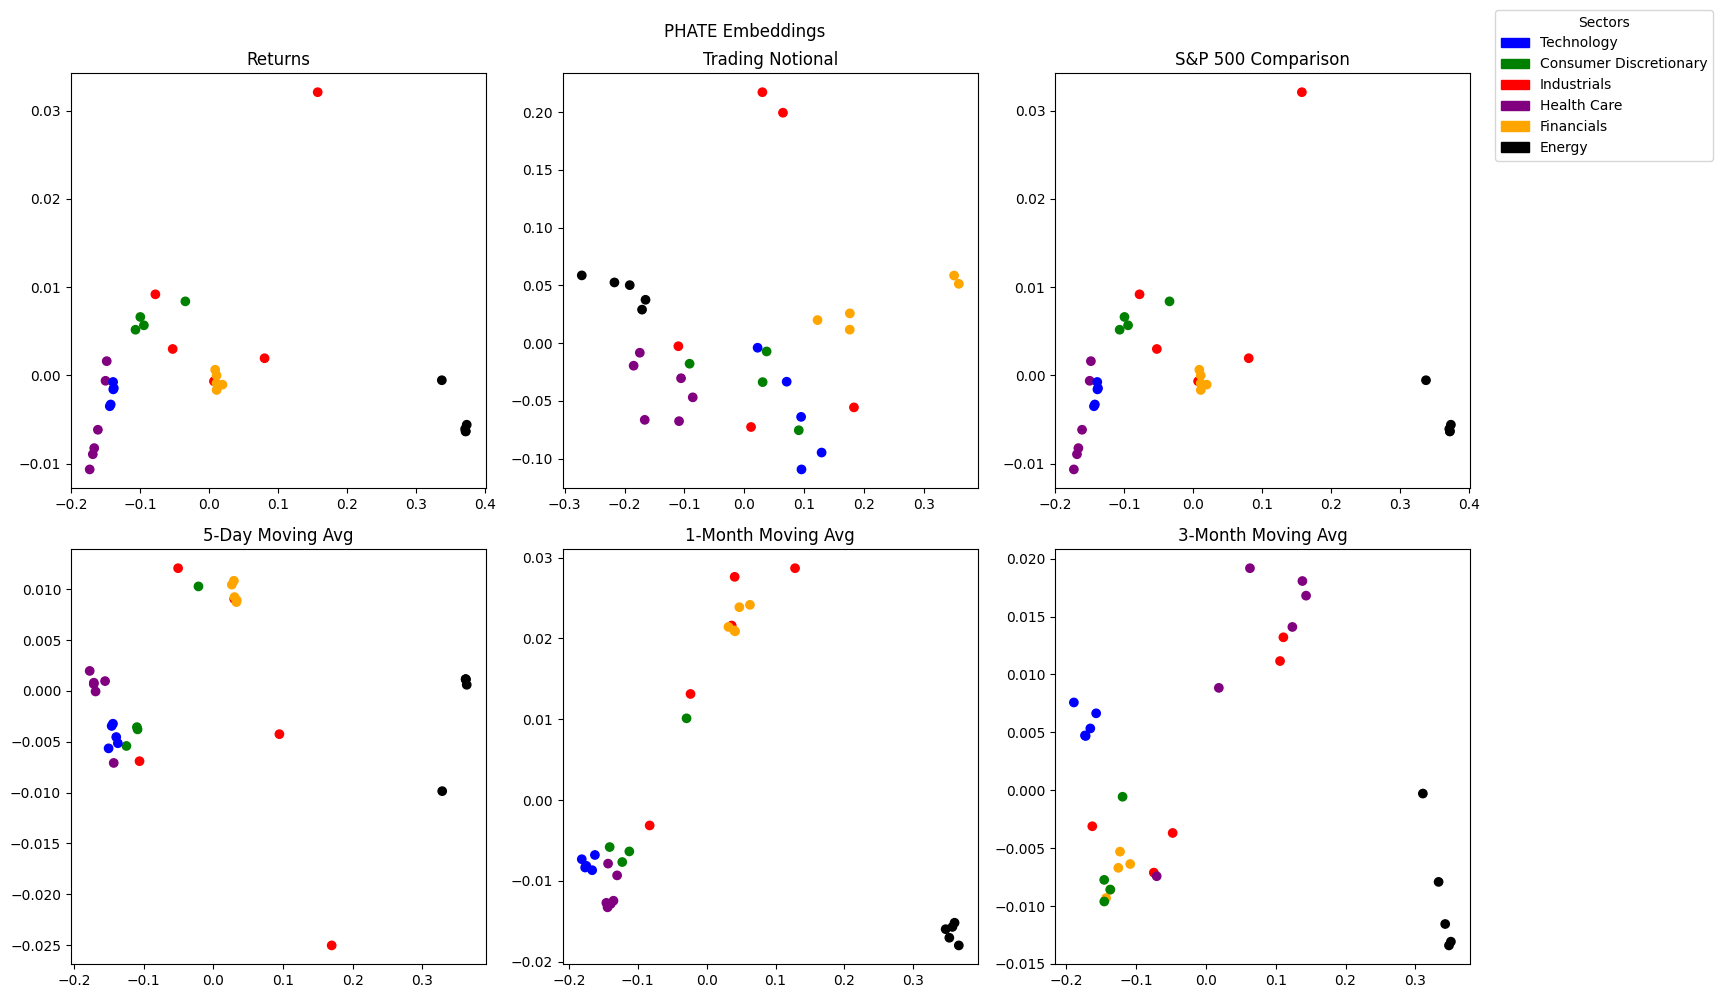

<ipython-input-245-ad6a2c31fb07>:40: UserWarning:

The figure layout has changed to tight



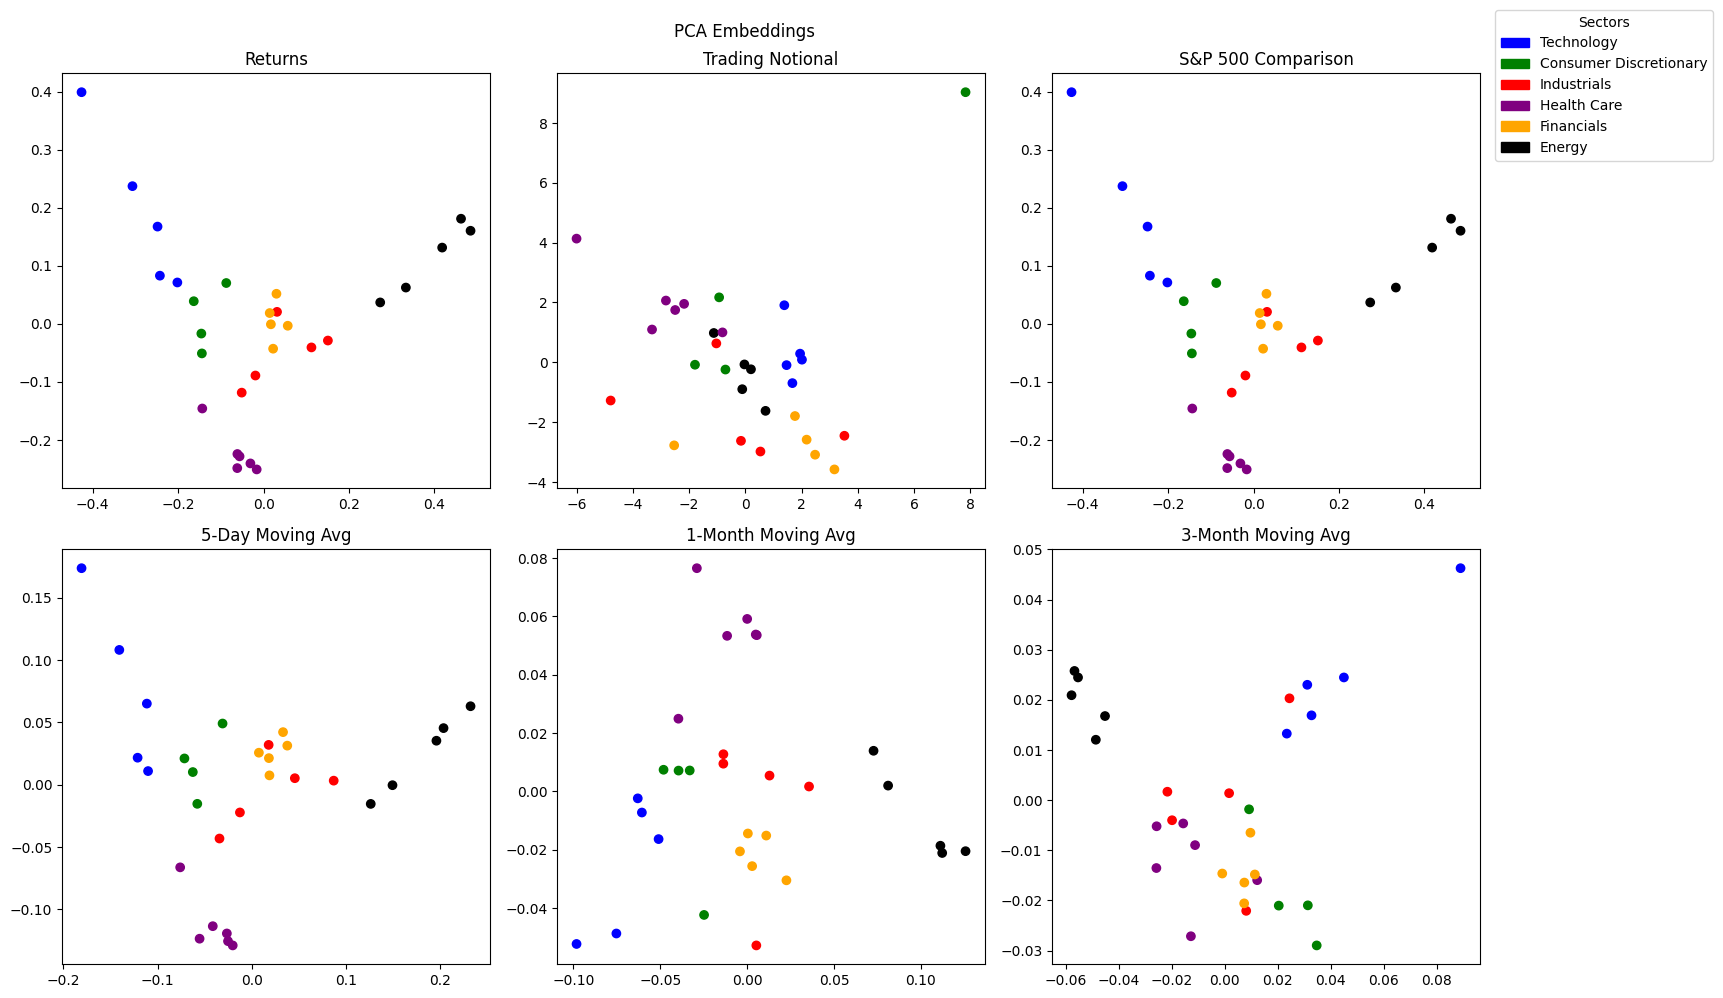

<ipython-input-245-ad6a2c31fb07>:40: UserWarning:

The figure layout has changed to tight



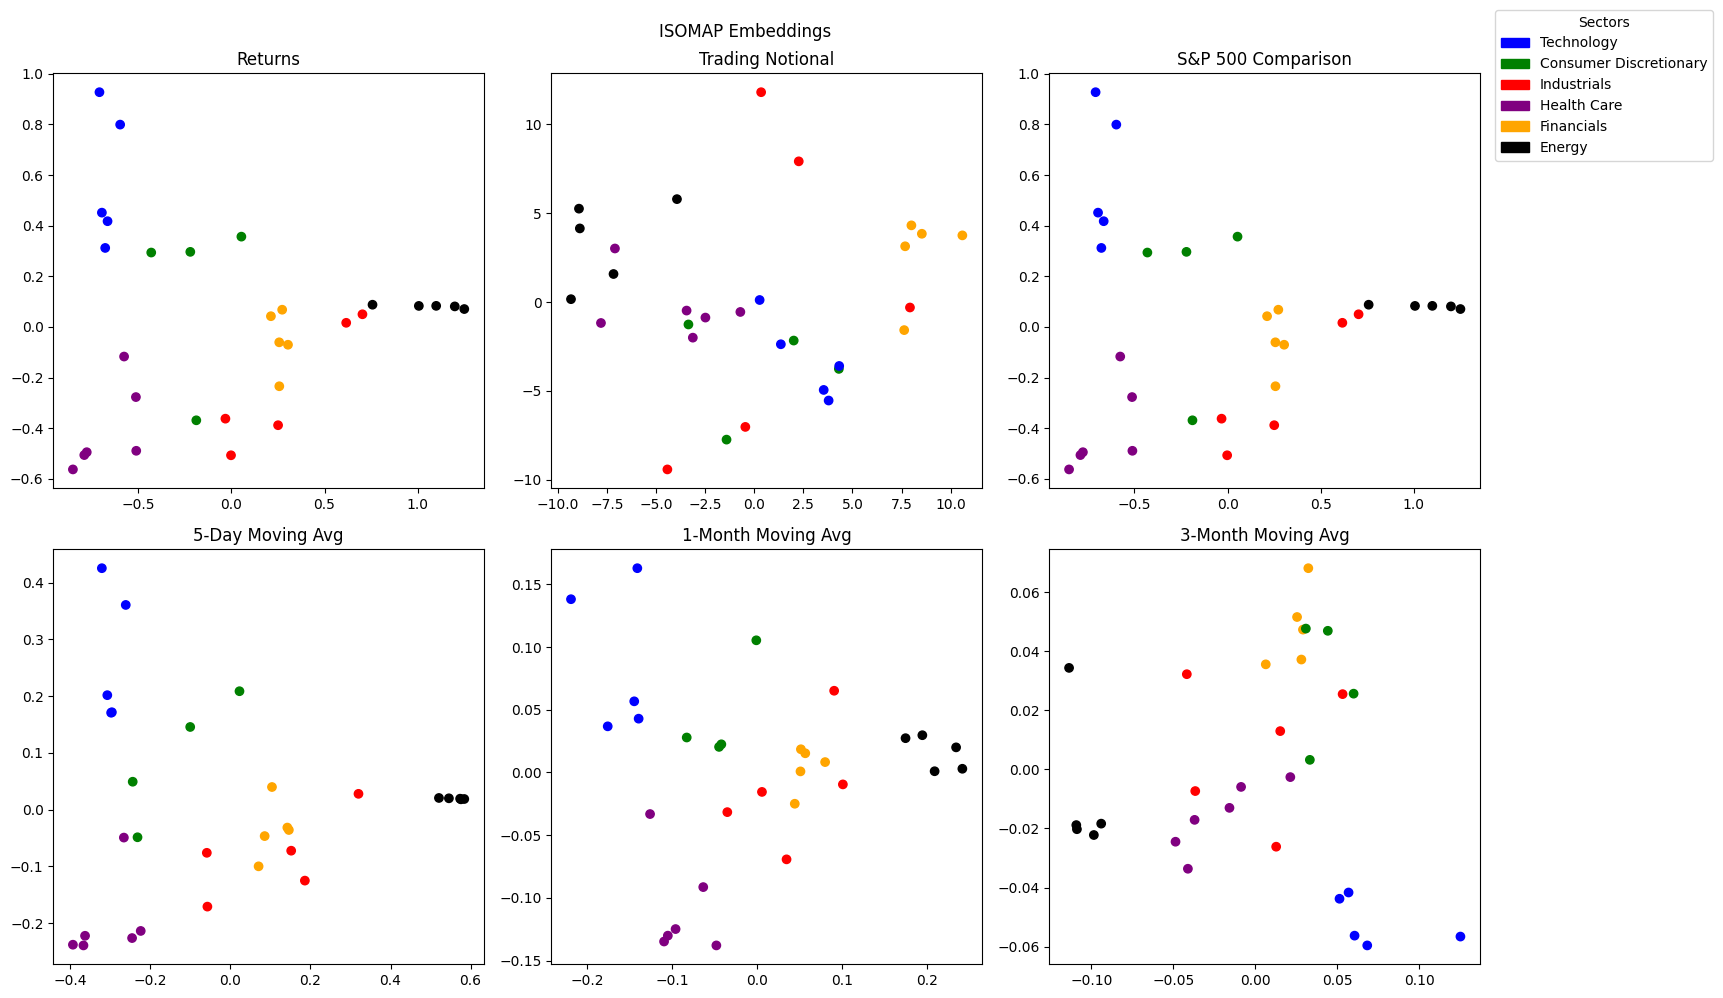

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

<ipython-input-245-ad6a2c31fb07>:40: UserWarning:

The figure layout has changed to tight



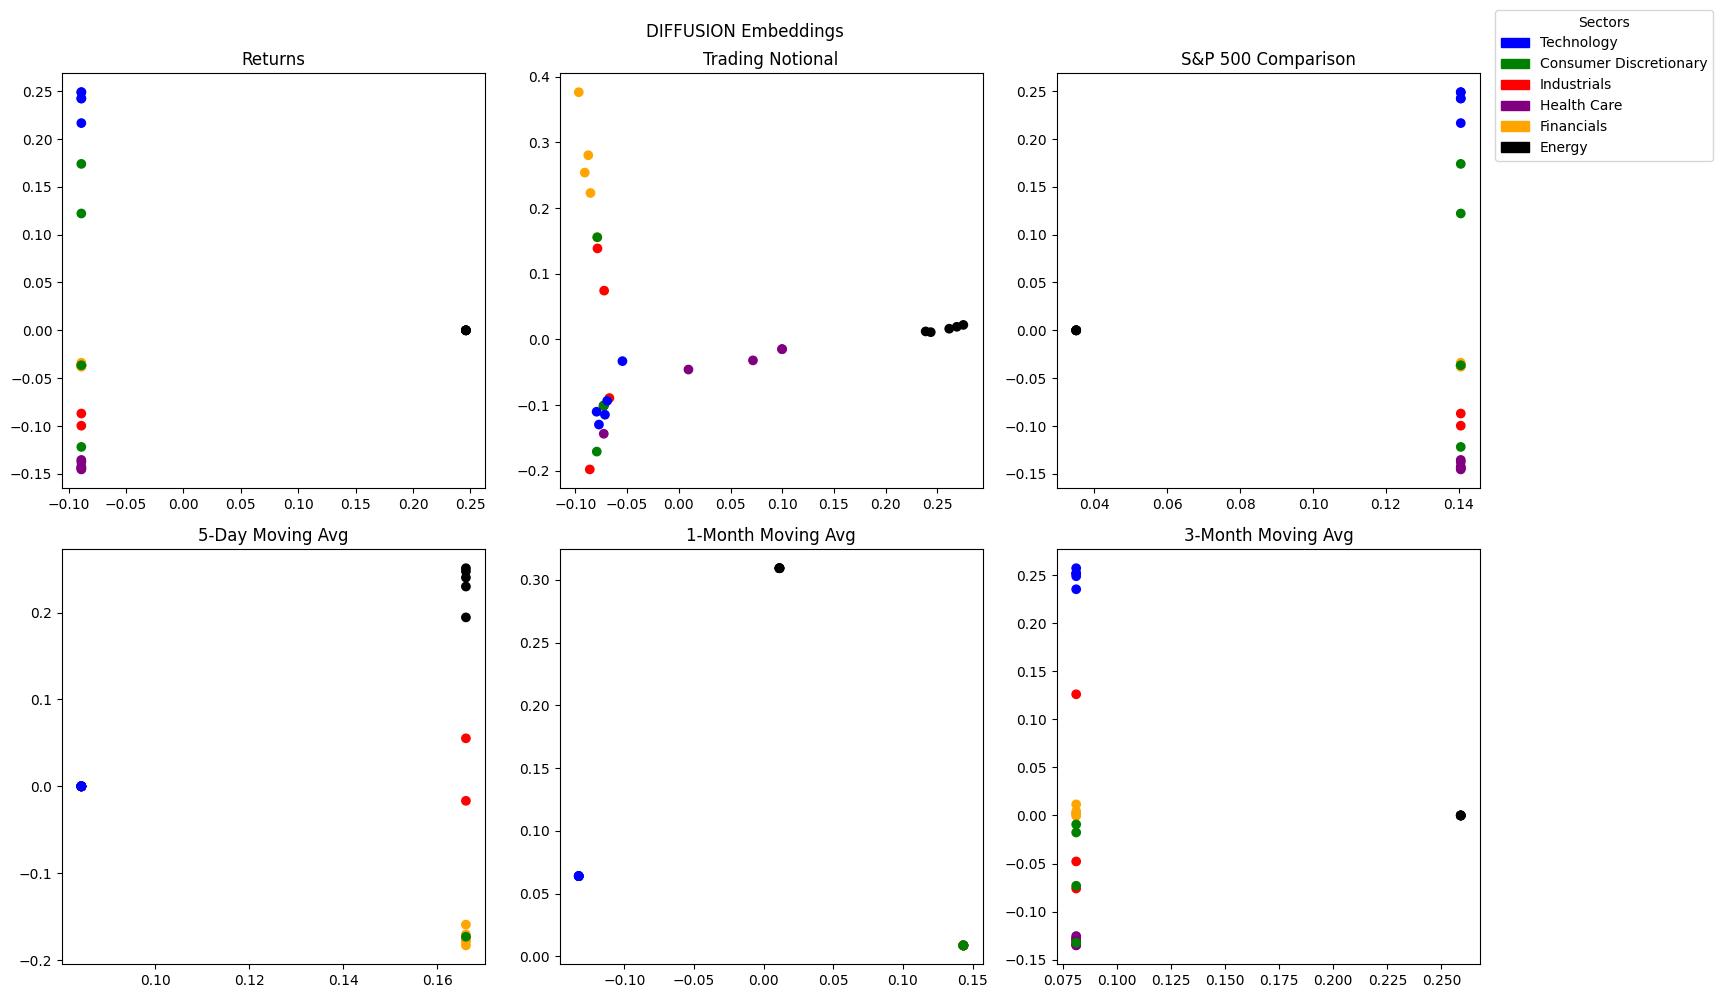

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
def plot_embeddings(df_list, titles, embedding_type='umap'):

    # Set up a figure for the embeddings
    fig, axs = plt.subplots(2, 3, figsize=(15, 10), constrained_layout=True)
    fig.suptitle(f"{embedding_type.upper()} Embeddings")

    embeddings = []

    # Loop through the dataframes and their respective axes
    for df, ax, title in zip(df_list, axs.flatten(), titles):
        df = df.T
        # Apply the selected embedding
        if embedding_type == 'umap':
            embedding = umap.UMAP(n_components=2, random_state=232).fit_transform(df)
        elif embedding_type == 'tsne':
            n_samples = df.shape[0]
            embedding = TSNE(n_components=2, perplexity=max(5, n_samples-1), random_state=232).fit_transform(df)
        elif embedding_type == 'phate':
            embedding = phate.PHATE(random_state=232).fit_transform(df)
        elif embedding_type == 'pca':
            embedding = PCA(n_components=2).fit_transform(df)
        elif embedding_type == 'isomap':
            embedding = Isomap(n_components=2).fit_transform(df)
        elif embedding_type == 'diffusion':
            embedding = SpectralEmbedding(n_components=2).fit_transform(df)
        else:
            raise ValueError("Unknown embedding type specified")

        #save embedding
        embeddings.append(embedding)

        # Plot the embedding
        colors = [sector_colors[ticker_sector[ticker]] for ticker in tickers]
        sector_legend = [mpatches.Patch(color=color, label=sector) for sector, color in sector_colors.items()]
        ax.scatter(embedding[:, 0], embedding[:, 1], c=colors)
        ax.set_title(title)
        #ax.legend(handles=sector_legend, title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')

    fig.legend(handles=sector_legend, title="Sectors", loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.tight_layout()
    if SAVE_FIGS:
       plt.savefig(f'{embedding_type}.png', dpi=300)
    plt.show()

    return embeddings

dataframes = [returns_df, volume_df, relative_returns_df, moving_average_5d_df, moving_average_21d_df, moving_average_63d_df]
titles = [RETURNS_TITLE, VOLUME_TITLE, SP500_TITLE, DAYS5_TITLE, MONTHS1_TITLE, MONTHS3_TITLE]
embedding_types = ['umap', 'tsne', 'phate', 'pca', 'isomap', 'diffusion']
all_embeddings = {}

for emb_type in embedding_types:
    embeddings = plot_embeddings(dataframes, titles, embedding_type=emb_type)
    all_embeddings[emb_type] = embeddings
clustering_metrics = {}


for emb_type, embeddings in all_embeddings.items():
    clustering_metrics[emb_type] = {}
    for i, embedding in enumerate(embeddings):
        kmeans = KMeans(n_clusters=6)
        labels = kmeans.fit_predict(embedding)

        silhouette = silhouette_score(embedding, labels)
        calinski = calinski_harabasz_score(embedding, labels)
        davies = davies_bouldin_score(embedding, labels)

        clustering_metrics[emb_type][titles[i]] = {
            'Silhouette Score': silhouette,
        }

# plot_embeddings(dataframes, titles, embedding_type='umap')
# plot_embeddings(dataframes, titles, embedding_type='tsne')
# plot_embeddings(dataframes, titles, embedding_type='phate')
# plot_embeddings(dataframes, titles, embedding_type='pca')
# plot_embeddings(dataframes, titles, embedding_type='isomap')
# plot_embeddings(dataframes, titles, embedding_type='diffusion')

In [ ]:
def print_scores(clustering_metrics):
    for emb_type, metrics in clustering_metrics.items():
        print(f"\n{emb_type.upper()} Embedding Scores:")
        for title, scores in metrics.items():
            print(f"\n  {title}:")
            for metric, value in scores.items():
                print(f"    {metric}: {value:.3f}")

print_scores(clustering_metrics)


UMAP Embedding Scores:

  Returns:
    Silhouette Score: 0.447

  Trading Notional:
    Silhouette Score: 0.352

  S&P 500 Comparison:
    Silhouette Score: 0.439

  5-Day Moving Avg:
    Silhouette Score: 0.437

  1-Month Moving Avg:
    Silhouette Score: 0.430

  3-Month Moving Avg:
    Silhouette Score: 0.453

TSNE Embedding Scores:

  Returns:
    Silhouette Score: 0.490

  Trading Notional:
    Silhouette Score: 0.455

  S&P 500 Comparison:
    Silhouette Score: 0.497

  5-Day Moving Avg:
    Silhouette Score: 0.550

  1-Month Moving Avg:
    Silhouette Score: 0.258

  3-Month Moving Avg:
    Silhouette Score: 0.286

PHATE Embedding Scores:

  Returns:
    Silhouette Score: 0.690

  Trading Notional:
    Silhouette Score: 0.527

  S&P 500 Comparison:
    Silhouette Score: 0.690

  5-Day Moving Avg:
    Silhouette Score: 0.686

  1-Month Moving Avg:
    Silhouette Score: 0.699

  3-Month Moving Avg:
    Silhouette Score: 0.669

PCA Embedding Scores:

  Returns:
    Silhouette Scor

### H's Gaussian noise analysis

In [ ]:
# dataframe with Gaussian noise
#std_devs = returns_df.std()
std_coeff = [0.1, 0.2, 0.4, 0.8, 1.6, 3.2]

noisy_returns_df_1 = returns_df * (1 + np.random.normal(0, np.outer(np.ones(returns_df.shape[0]), std_coeff[0])))
noisy_returns_df_2 = returns_df * (1 + np.random.normal(0, np.outer(np.ones(returns_df.shape[0]), std_coeff[1])))
noisy_returns_df_3 = returns_df * (1 + np.random.normal(0, np.outer(np.ones(returns_df.shape[0]), std_coeff[2])))
noisy_returns_df_4 = returns_df * (1 + np.random.normal(0, np.outer(np.ones(returns_df.shape[0]), std_coeff[3])))
noisy_returns_df_5 = returns_df * (1 + np.random.normal(0, np.outer(np.ones(returns_df.shape[0]), std_coeff[4])))
noisy_returns_df_6 = returns_df * (1 + np.random.normal(0, np.outer(np.ones(returns_df.shape[0]), std_coeff[5])))

noisy_returns_df_1.head()

In [ ]:
# Gaussian noise plot
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=("σ = 0.1", "σ = 0.2", "σ = 0.4", "σ = 0.8", "σ = 1.6", "σ = 3.2")
)

laplacian_2d(noisy_returns_df_1, "σ = 0.1", fig, 1, 1)
laplacian_2d(noisy_returns_df_2, "σ = 0.2", fig, 1, 2)
laplacian_2d(noisy_returns_df_3, "σ = 0.4", fig, 1, 3)
laplacian_2d(noisy_returns_df_4, "σ = 0.8", fig, 2, 1)
laplacian_2d(noisy_returns_df_5, "σ = 1.6", fig, 2, 2)
laplacian_2d(noisy_returns_df_6, "σ = 3.2", fig, 2, 3, True)

fig.update_layout(height=800, width=1400, title_text="2D Laplacian Eigenmaps with Gaussian Noise", showlegend=True)

# save at interactive HTML
if SAVE_FIGS:
  fig.write_html('Noise.html')

fig.show()